<p align="center"><img src = https://images.unsplash.com/opengraph/1x1.png?blend=https%3A%2F%2Fimages.unsplash.com%2Fphoto-1530521954074-e64f6810b32d%3Fblend%3D000000%26blend-alpha%3D10%26blend-mode%3Dnormal%26crop%3Dfaces%252Cedges%26h%3D630%26mark%3Dhttps%253A%252F%252Fimages.unsplash.com%252Fopengraph%252Fsearch-input.png%253Fh%253D84%2526txt%253Dtravel%252Binsurance%2526txt-align%253Dmiddle%25252Cleft%2526txt-clip%253Dellipsis%2526txt-color%253D000000%2526txt-pad%253D80%2526txt-size%253D40%2526txt-width%253D660%2526w%253D750%2526auto%253Dformat%2526fit%253Dcrop%2526q%253D60%26mark-align%3Dmiddle%252Ccenter%26mark-w%3D750%26w%3D1200%26auto%3Dformat%26fit%3Dcrop%26q%3D60%26ixid%3DM3wxMjA3fDB8MXxzZWFyY2h8Nnx8dHJhdmVsJTIwaW5zdXJhbmNlfGVufDB8fHx8MTcxNTA4MjAxNXww%26ixlib%3Drb-4.0.3&blend-w=1&h=630&mark=https%3A%2F%2Fimages.unsplash.com%2Fopengraph%2Flogo.png&mark-align=top%2Cleft&mark-pad=50&mark-w=64&w=1200&auto=format&fit=crop&q=60>

# **Travel insurance claim prediction**

**By Harish Muhammad**

## **1. Business Problem Understanding**

**Context**

The travel insurance enterprise is a sector of the broader insurance industry that provides coverage for individuals and businesses against risks associated with travel. Travel insurance is designed to protect travelers from financial loss due to unexpected events before or during their trips. These events may include trip cancellations, medical emergencies, lost luggage, flight delays, or other unforeseen circumstances. Travel insurance policies are sold through various distribution channels, including insurance companies, travel agencies, online travel agencies (OTAs), airlines, banks, and credit card companies. Consumers can purchase travel insurance as a standalone policy or as part of a travel package. Travel insurance companies make a profit through a combination of factors. They collect premiums from policyholders, which act as their main source of revenue. To make a profit, they carefully calculate the premiums based on factors like the traveler's age, destination, trip duration, and coverage limits. Insurance companies also invest the premiums received to generate additional income. They aim to strike a balance between collecting enough premiums to cover potential claims and expenses, while also generating a profit from the premiums collected via investment. 


**Problem statement**

Maintaining sufficient balance between customer premium with claims and expenses is the crucial issue of the industry. The enterprise must be able to calculate the number of premium that need to be collected and the number of claim that they will be able to handle. The travel insurance enterprise need to be able to calculate the risk accurately. The ability to predict customers who are claim and not claim, and calculate the probability of it will help them in managing the risks. By being able to distinguish customers who are likely to claim and not claim, insurers can make better planning in allocation of their fund, optimize their operations, potentially lower operational cost and in overall improve profitability.

**Goal**

Based on the previous problem statement, an international travel insurance enterprise want to initiate predictive modelling for improving their risk assesment system. This model should be able to predict which one of their customers who is more likely to claim the insurance based on the given historical data. In addition to that, we want to know which risk factors or variables that are crucial in increasing customer probabilty to claim the insurance. 


**Analytical approach**

We want to analyze data to learn about pattern that can differentiate customers who will claim the insurance and who will not. Then, we will build classification model to help the travel insurance enterprise in predicting which policyholders that is more likely to claim the travel insurance and which policyholders that won't.
 


**Metric evaluation**

We want to focus on to the the customers who will claim the insurance, so we decide our target shown below as

Target:
* 0 : Customers who are not eliglible to claim the travel insurance
* 1 : Customers who are eliglible to claim the travel insurance

<img src="https://assets-global.website-files.com/6266b596eef18c1931f938f9/644aea65cefe35380f198a5a_class_guide_cm08.png" alt="Confusion Matrix" width="1000">


Type 1 error: False Positive (Customers are predicted as policyholders who are eliglible for claim and claiming the travel insurance. However in actual conditions, they are not eliglible for the claim)
Consequences: We have to pay for the cost of processing and claim inspection. 

Type 2 error: False Negative (Customers are predicted as policyholders who are not eligible for claim or not claiming. However in reality, they are actually eliglible for claim and claiming the travel insurance)
Consequences: We have to pay for insurance claims, processing and claim inspection cost.


To provide quantitative overview of these consequences, we will conduct calculation based on these assumptions:
* Policy price: Policy may range from USD 154 to USD 437 (about 5% to 6% of total trip cost) with average of USD 228 ([forbes]('https://www.forbes.com/advisor/travel-insurance/average-travel-insurance-cost/'))
* Processing claim cost: The cost component to asses claims about USD 200 that includes (document processing cost, investigation cost, document verification cost, and workers) ([general insurance code]('https://www.afca.org.au/about-afca/codes-of-practice/general-insurance-code-of-practice'))
* Claim insurance cost: calculating the cost of claims is relatively difficult, as there are many factors that can influence it. However according to ([which.co.uk]('https://www.which.co.uk/news/article/the-most-common-travel-insurance-claims-revealed-aEpbn8J7cUzN')), the average claim for single trip policies worldwide is £976 (equivalent to $1241).

Based on these assumption above, we can try to calculate the consequences as:
* Cost for False Positive (processing and claim inspection) --> USD 200
* Cost for False Negative (insurance claim, processing and claim inspection cost --> USD 200 + USD 1241

According to the consequences above, we need to be able to make a model that can reduce claims for the enterprise, especially reducing False Positive and minimizing False Negative as many as possible. Unfortunately due to the highly imbalanced of the travel insurance dataset with 98.5% of samples being non-claims and only 1.5% being claims, we cannot use only accuracy as it will simply predicting all instance as non-claims and still seem accurate. Thus, we are using ROC-AUC score for metric as it provides an aggregate measure of performance across all possible thresholds, it considers both true positives (correctly identified claims) and false positives (incorrectly identified claims). This gives a balanced measure of the model's effectiveness.

## **2. Data Understanding**

The travel insurance dataset can be accessed through this link: [dataset](https://drive.google.com/file/d/1emDTGFvku7UuuVT3W-EmEvg3i61QrIU-/view?usp=sharing)

The dataset contains historical data of anonymous customer lists. Each row represents travel insurance data of each customers that in general consist of demographic customer profile, insurance service specifications, and claim status.

Note:
- Dataset is heavily imbalance. Non-claiming customers are much higher than claiming customers.
- Features consist of numerical and categorical data. Some features have high cardinality.

**Initiating setup**

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.pipeline import Pipeline

# Resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTENC

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# metrics and reports
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, classification_report, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from matplotlib.colors import LinearSegmentedColormap

# Hyperparameter tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Other libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Customizing with 'ggplot' style
plt.style.use('ggplot')

In [3]:
# Loading dataset
data = pd.read_csv('data_travel_insurance.csv')

# Reviewing dataset
data.head()

Agency    Agency Type Distribution Channel              Product Name Gender  \
0    C2B       Airlines               Online        Annual Silver Plan      F   
1    EPX  Travel Agency               Online         Cancellation Plan    NaN   
2    JZI       Airlines               Online                Basic Plan      M   
3    EPX  Travel Agency               Online  2 way Comprehensive Plan    NaN   
4    C2B       Airlines               Online               Bronze Plan      M   

   Duration    Destination  Net Sales  Commision (in value)  Age Claim  
0       365      SINGAPORE      216.0                  54.0   57    No  
1         4       MALAYSIA       10.0                   0.0   33    No  
2        19          INDIA       22.0                   7.7   26    No  
3        20  UNITED STATES      112.0                   0.0   59    No  
4         8      SINGAPORE       16.0                   4.0   28    No

In [4]:
# Creating back up # Just for comparison
data_backup = data.copy()

In [5]:
# Data dimension
data.shape

(44328, 11)

In [6]:
# Reviewing features
data.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Gender', 'Duration', 'Destination', 'Net Sales',
       'Commision (in value)', 'Age', 'Claim'],
      dtype='object')

In [7]:
# Data Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB



This dataset contains some information that can be divided as:
- Travel insurance providers (insurers) and types: 'Agency', 'Agency Type', 'Distribution Channel' 
- Insurance product or service specifications used by customers: 'Product Name', 'Duration', 'Net Sales' 
- Customer demographic information: 'Gender', 'Age', 'Destination'
- Status of the insurance claim whether it has been claimed or not in the column of 'Claim'

The description of each features can be seen as below:

| Attribute | Data Type | Description |
| --- | --- | --- |
| Agency | Object |  Name of agency or insurance providers| 
| Agency Type |  Object | Type of travel insurance agencies | 
| Distribution Channel |  Object |  Channel of travel insurance agencies| 
| Product Name |  Object | Name of the travel insurance products | 
| Gender | Object | The gender of insured | 
| Duration | Integer |  Duration of travel | 
| Destination | Object |  Destination of travel | 
|  Net Sales | Float |  Amount of sales of travel insurance policies | 
| Commission (in value) | Float | Commission received for travel insurance agency | 
| Age | Integer |  Age of insured customers | 
| Claim | Object |  Claim status | 


Note:

* Every row represents one travel insurance policyholder
* Features are consist of:
    * Categorical: 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender', 'Destination'
    * Numerical: 'Net Sales', 'Commision (in value)', 'Age', 'Duration'
* Target is the 'Claim' column
* Dataset is imbalanced (extreme imbalance), because the proportion of minority class is only about 1% of total dataset [source](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)
* We have missing values in the column of 'Gender'



In [8]:
# Initial assessment
# Displaying maximum view
pd.set_option('display.max_colwidth', None)

# Check data types, missing values, negative values, unique values for each column
assessment_data = pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'missing_value_sum': data.isna().sum(),
    'missing_value_pct': round((data.isna().sum() / len(data)) * 100, 2),
    'negative_value': [(data[col] < 0).any() if data[col].dtype in ['int64', 'float64'] else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

assessment_data


feature data_type  missing_value_sum  \
Agency                              Agency    object                  0   
Agency Type                    Agency Type    object                  0   
Distribution Channel  Distribution Channel    object                  0   
Product Name                  Product Name    object                  0   
Gender                              Gender    object              31647   
Duration                          Duration     int64                  0   
Destination                    Destination    object                  0   
Net Sales                        Net Sales   float64                  0   
Commision (in value)  Commision (in value)   float64                  0   
Age                                    Age     int64                  0   
Claim                                Claim    object                  0   

                      missing_value_pct  negative_value  n_unique  \
Agency                             0.00           False        16   
Agency Type                        0.00           False         2   
Distribution Channel               0.00           False         2   
Product Name                       0.00           False        26   
Gender                            71.39           False         2   
Duration                           0.00            True       437   
Destination                        0.00           False       138   
Net Sales                          0.00            True      1006   
Commision (in value)               0.00           False       915   
Age                                0.00           False        89   
Claim                              0.00           False         2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          sample_unique  
Agency                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [C2B, EPX, JZI, CWT, LWC, ART, C

**Descriptive Statistics**

In [9]:
display(data.describe().T, data.describe(include='O').T)

count       mean         std    min   25%   50%  \
Duration              44328.0  49.424292  109.153961   -1.0   9.0  22.0   
Net Sales             44328.0  40.550948   48.661970 -357.5  18.0  26.5   
Commision (in value)  44328.0   9.707692   19.625637    0.0   0.0   0.0   
Age                   44328.0  39.925600   13.954926    0.0  35.0  36.0   

                        75%     max  
Duration              53.00  4881.0  
Net Sales             48.00   810.0  
Commision (in value)  11.55   283.5  
Age                   43.00   118.0

count unique                top   freq
Agency                44328     16                EPX  24656
Agency Type           44328      2      Travel Agency  32113
Distribution Channel  44328      2             Online  43572
Product Name          44328     26  Cancellation Plan  12979
Gender                12681      2                  M   6504
Destination           44328    138          SINGAPORE   9267
Claim                 44328      2                 No  43651

We identified some information:
* **Agency**, There are 16 agencies in the dataset who participates in offering travel insurance
* **Agency Type**, There are two types of agencies that delivering travel insurance service, whether is direct from Airlines or from a Travel agency
    
* **Distribution Channel**, The distribution of travel insurance can be distributed via online and offline. However, online distribution is the majority of distributor
* **Product Name**, There are 26 products of travel insurance in the dataset. This feature has high cardinality, about 26 unique values.
* **Gender**, This feature have many missing values.
* **Duration**, There is a negative value of this numerical feature (e.g, Duration = -1). This is very likely an anomaly, since there is no negative value of duratio or no negative day. In addition to that, the maximum duration of 4881 is also an anomaly, since most insurace agencies do not provide cover for that long. There is a maximum limit of travel insurance duration, most of travel insurance offer up to 365 day of protection. Both of anomalies can be categorized as outliers. We will handle both of anomalies later.
* **Destination**, This feature contains very high cardinality, about 138 unique values.
* **Net Sales**, This numerical feature contains negative value. However, this might be normal due to higher cost of operation or marketing that than policies paid by customers.
* **Commision (in value)**, This numerical feature contains only positive value. In insurance field, commission is usually for brokers and net sales are for insurance companies. Some insurance companies will let independent brokers sell their insurance policies to customers. From that, brokers can charge a certain amount of premium. Brokers are not responsible for companies' profit. So, the net sales might be negative, but the commision should be always positive.
* **Age**, There is an anomaly of this feature as it contains age of 118. As a human unlikely reach this age and most insurance have age limit, we will eliminate it.
    


## **3. Exploratory Data Analysis**

### **Numerical**

Now, we want to check the properties of numerical features from the dataset. We have four numerical features that consist of 'Duration', 'Net Sales', 'Comission in (Value)' and 'Age'

**Data Distribution**

We want to see the data distribution of our numerical features. To check the data distribution, we conduct visual test by creating histogram  of numerical columns and conduct normality test (D'Agostino-Pearson method).

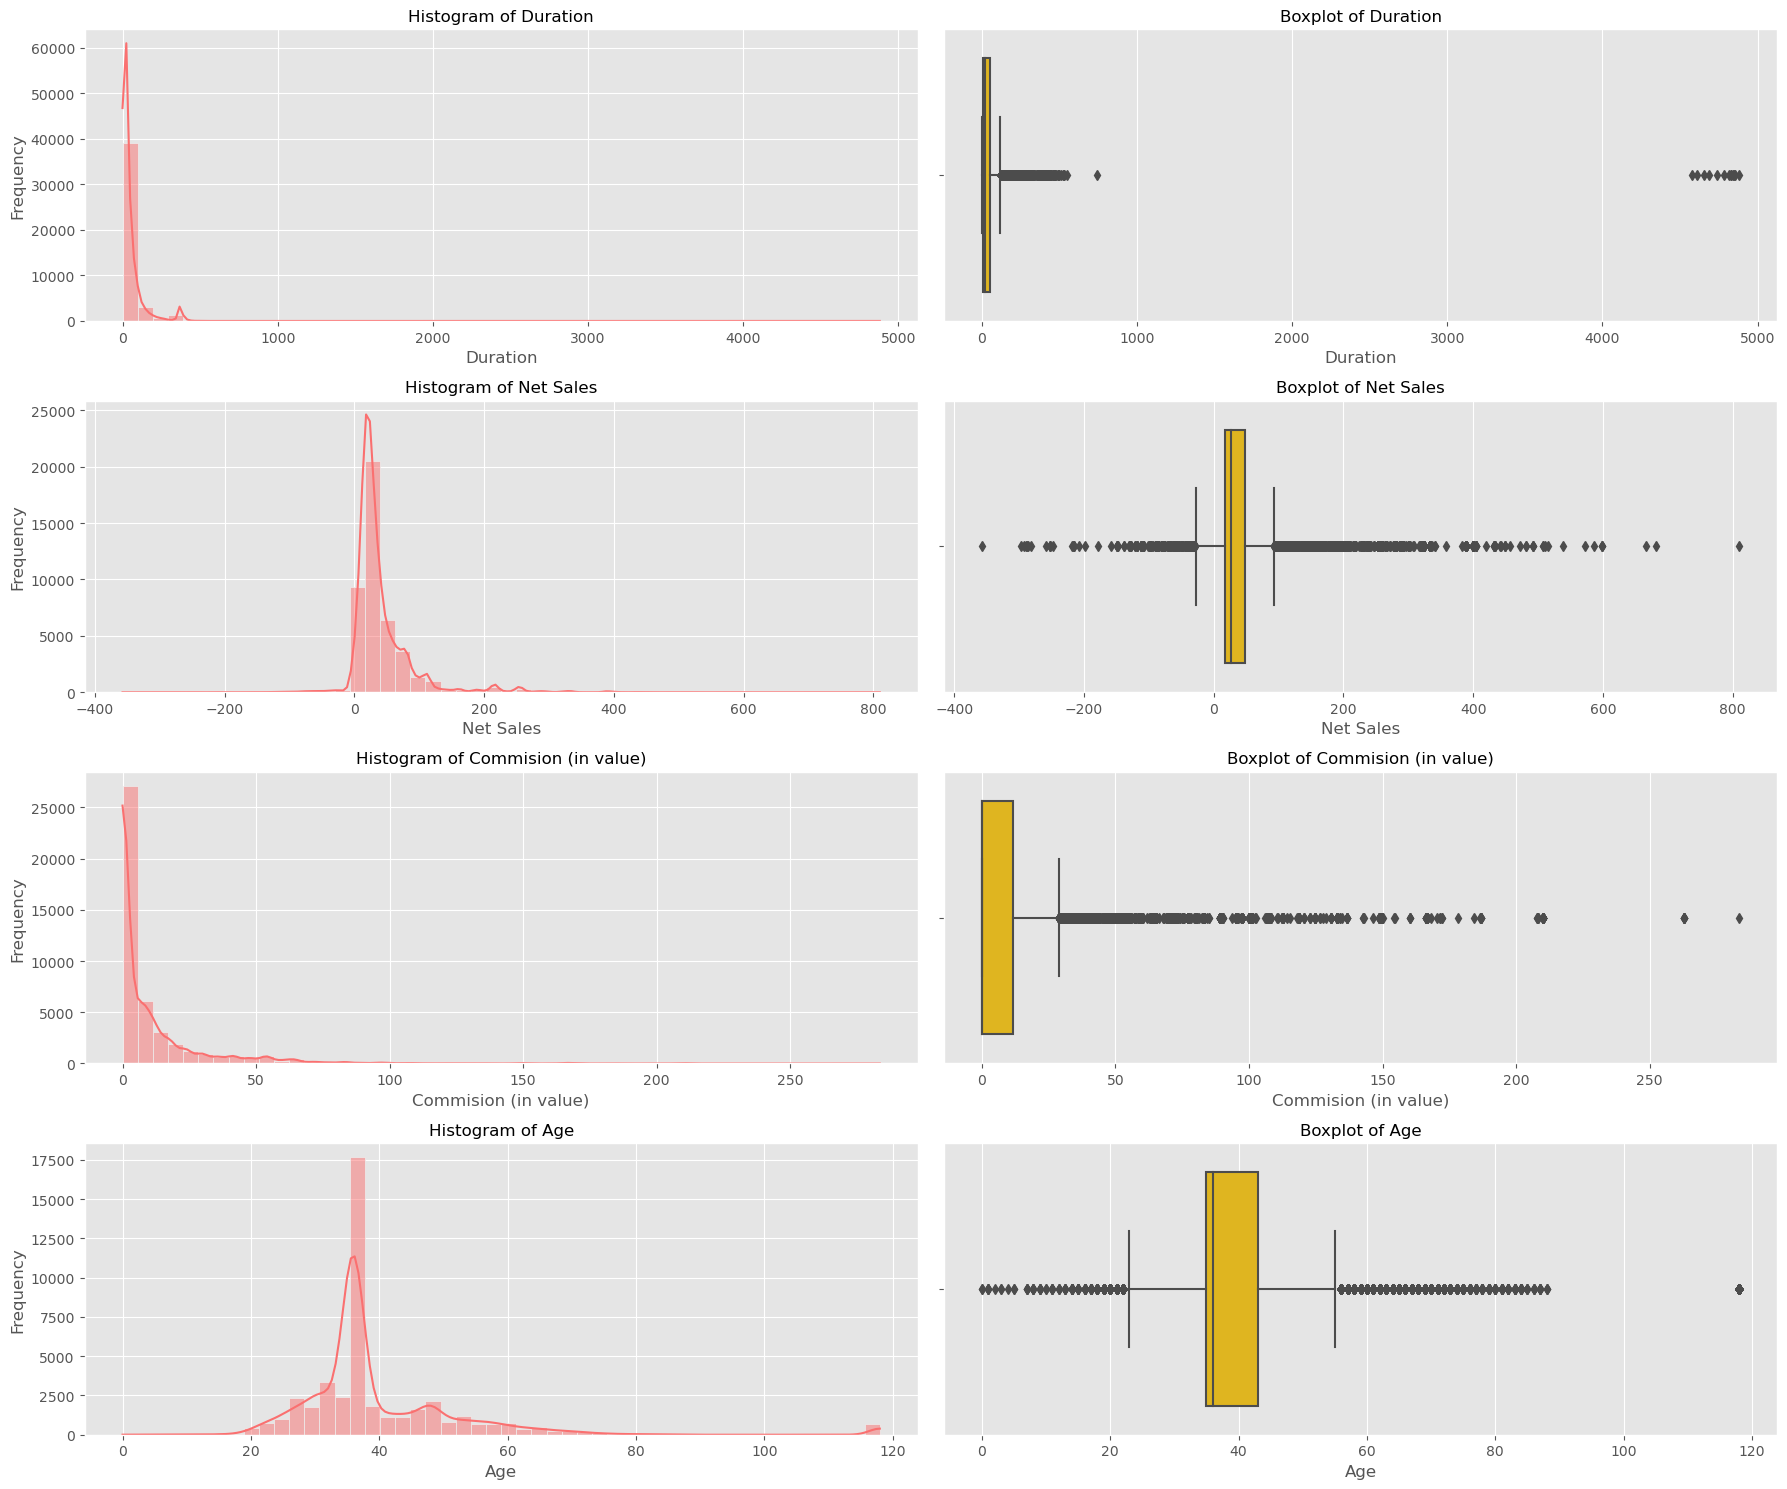

In [10]:
plt.figure(figsize=(18, 15))

numerical = [var for var in data.columns if data[var].dtypes not in ['object']]

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data[col], kde=True, color='#FA7070', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [11]:
numerical = [var for var in data.columns if data[var].dtypes not in ['object']]

from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(data[feature_name].dropna())
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

Feature  D'Agostino-Pearson Statistic  P-value  \
0              Duration                 106362.302085      0.0   
1             Net Sales                  32695.931743      0.0   
2  Commision (in value)                  37939.755693      0.0   
3                   Age                  28763.309947      0.0   

                Distributed  
0  Not Normally Distributed  
1  Not Normally Distributed  
2  Not Normally Distributed  
3  Not Normally Distributed

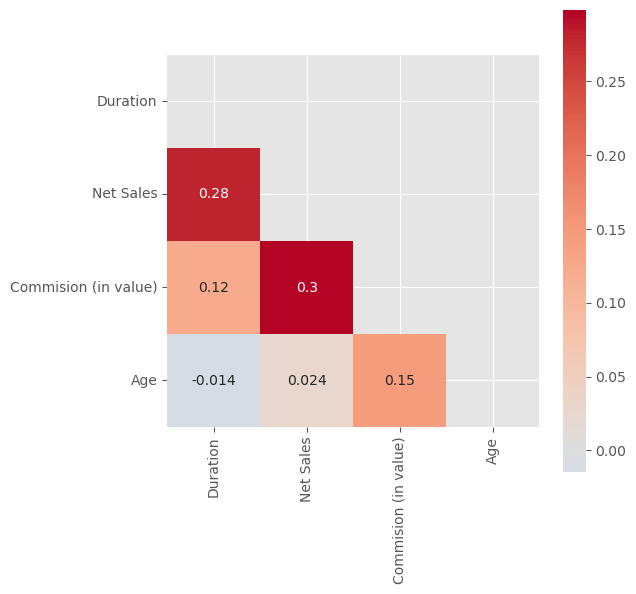

In [12]:
# Correlation between features
# Select numerical columns
numerical = data.select_dtypes(include=np.number)

# Correlation between features
plt.figure(figsize=(6, 6))

matrix = np.triu(numerical.corr(method='spearman'))

sns.heatmap(data=numerical.corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask=matrix, square=True)
plt.show()

Some insights from numerical features:
* Based on visual check of histogram on the numerical features, all of our features are not symetrical. Thus, all of them are not normally distributed
* According to the normality test (D'Agostino-Pearson method), all p-value's of numerical features are less than 0.05 that also confirmed these data are not normally distributed
* After noticing that our numerical data are not normally distrubuted, we can be sure to use Spearman correlation to check the correlation between features. few things that can be noticed, 'Net sales' has weak positive correlation with 'Duration' (Rs.0,28) and 'Commision (in value)' (Rs.0.3). So, the higher duration of insurance will positiviley correlate to the higher 'Net Sales' and the higher 'Net Sales' will also positively correlate to higher 'Commision'. Both things are quite make senses as people need to pay higher price for longer cover of travel insurance and the higher 'Net Sales' usually generate higher amount of 'Commision'. 



### **Categorical**

The categorical features consist of 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender', 'Destination'. Now we want to extract insights from these features.

In [13]:
# Defining categorical columns
categorical = [var for var in data.columns if data[var].dtypes in ['object']]

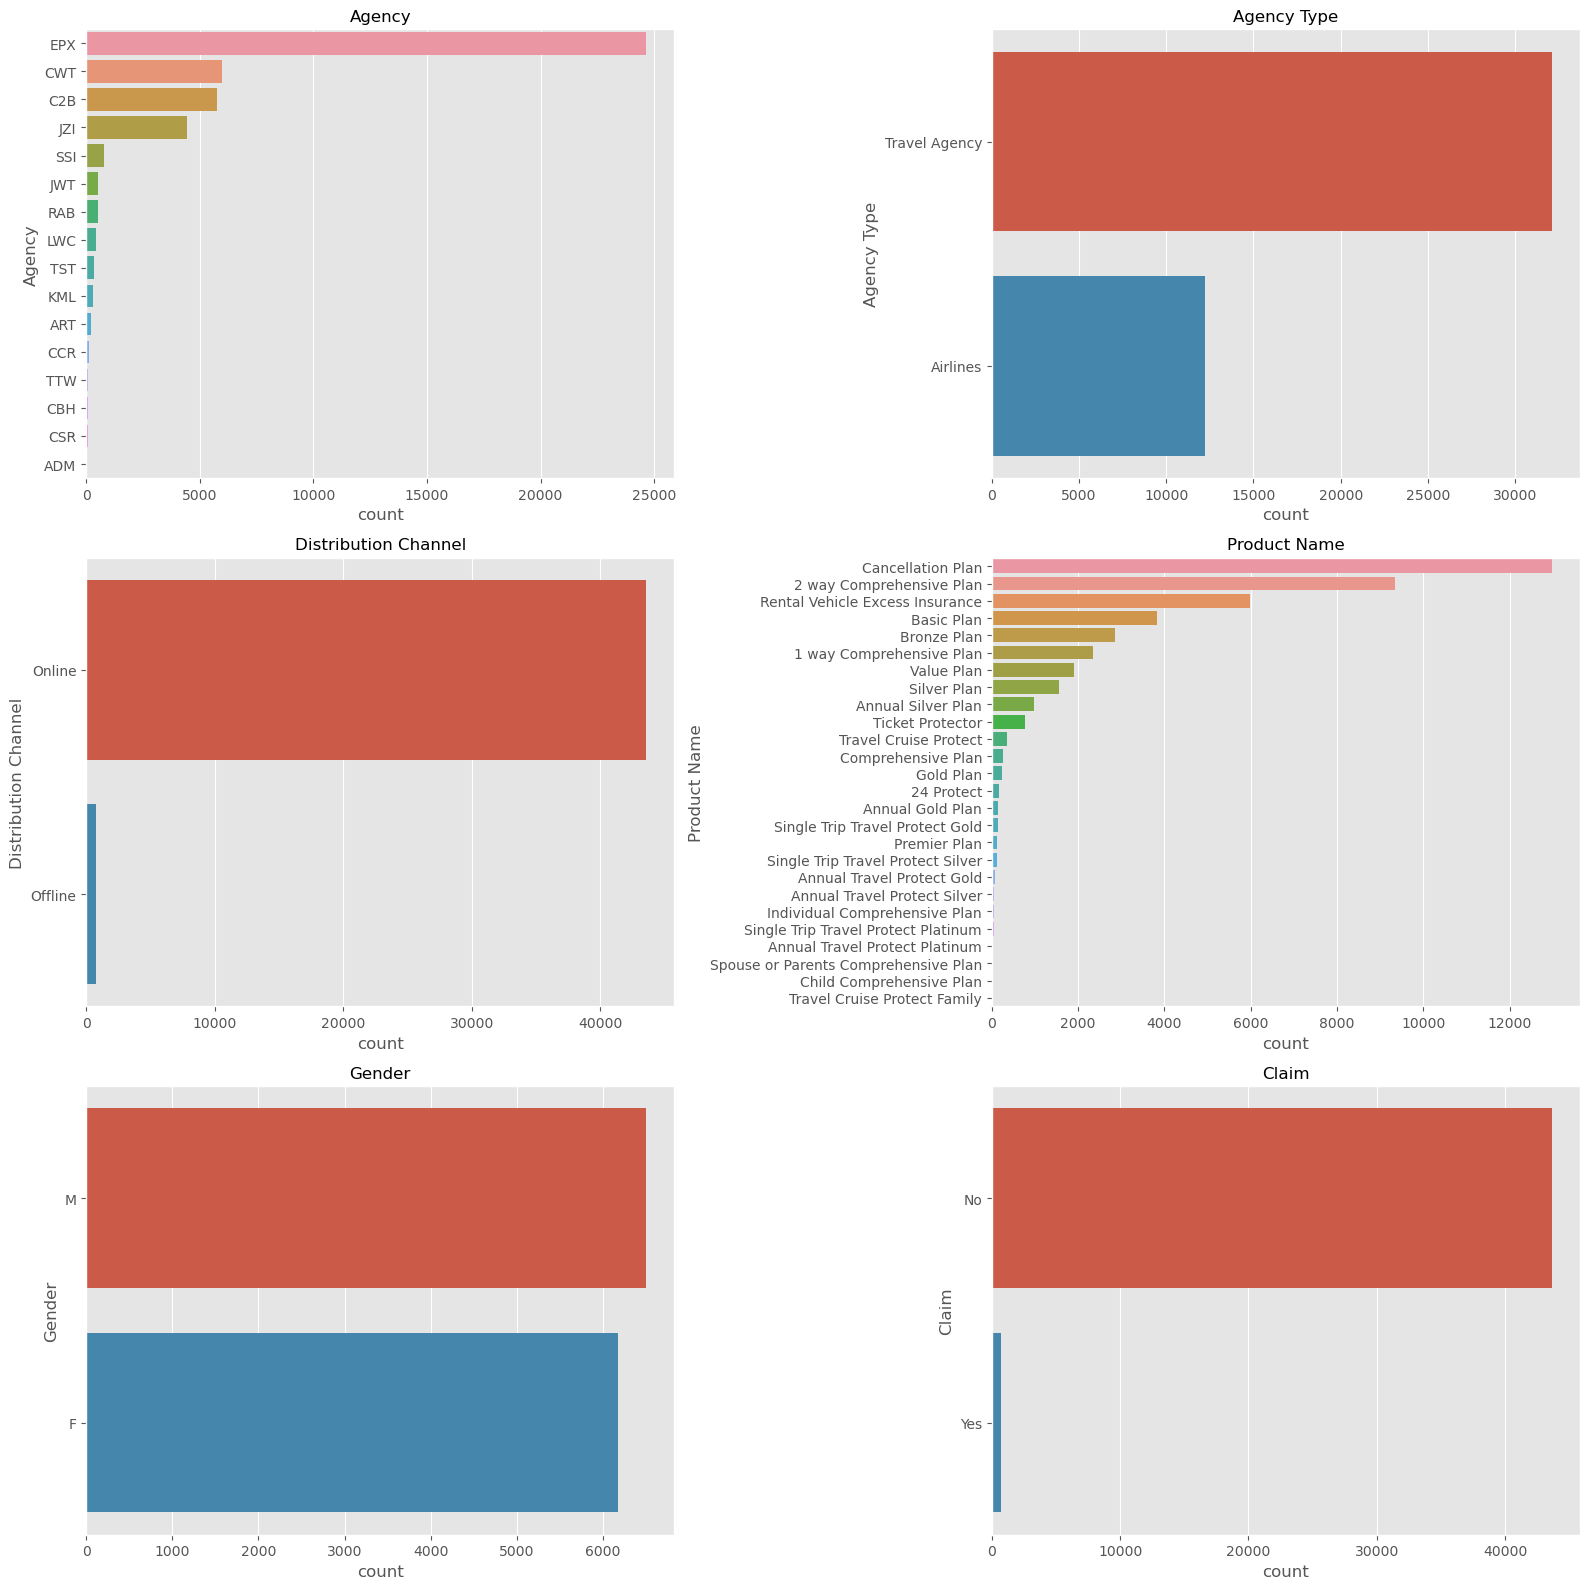

In [14]:
# Visualization of categorical features based on their uniques

# We want to separate the categorical of 'destination' for next visualization
categorical.pop(5)

fig, axes = plt.subplots(3, 2, figsize=(16, 16)) 
for i, j in zip(categorical, axes.flatten()):
    ax = sns.countplot(data=data, y= i, ax= j, order=data[i].value_counts().index)
    ax.set_title(f'{i}', size = 12) 

plt.tight_layout()
plt.show()

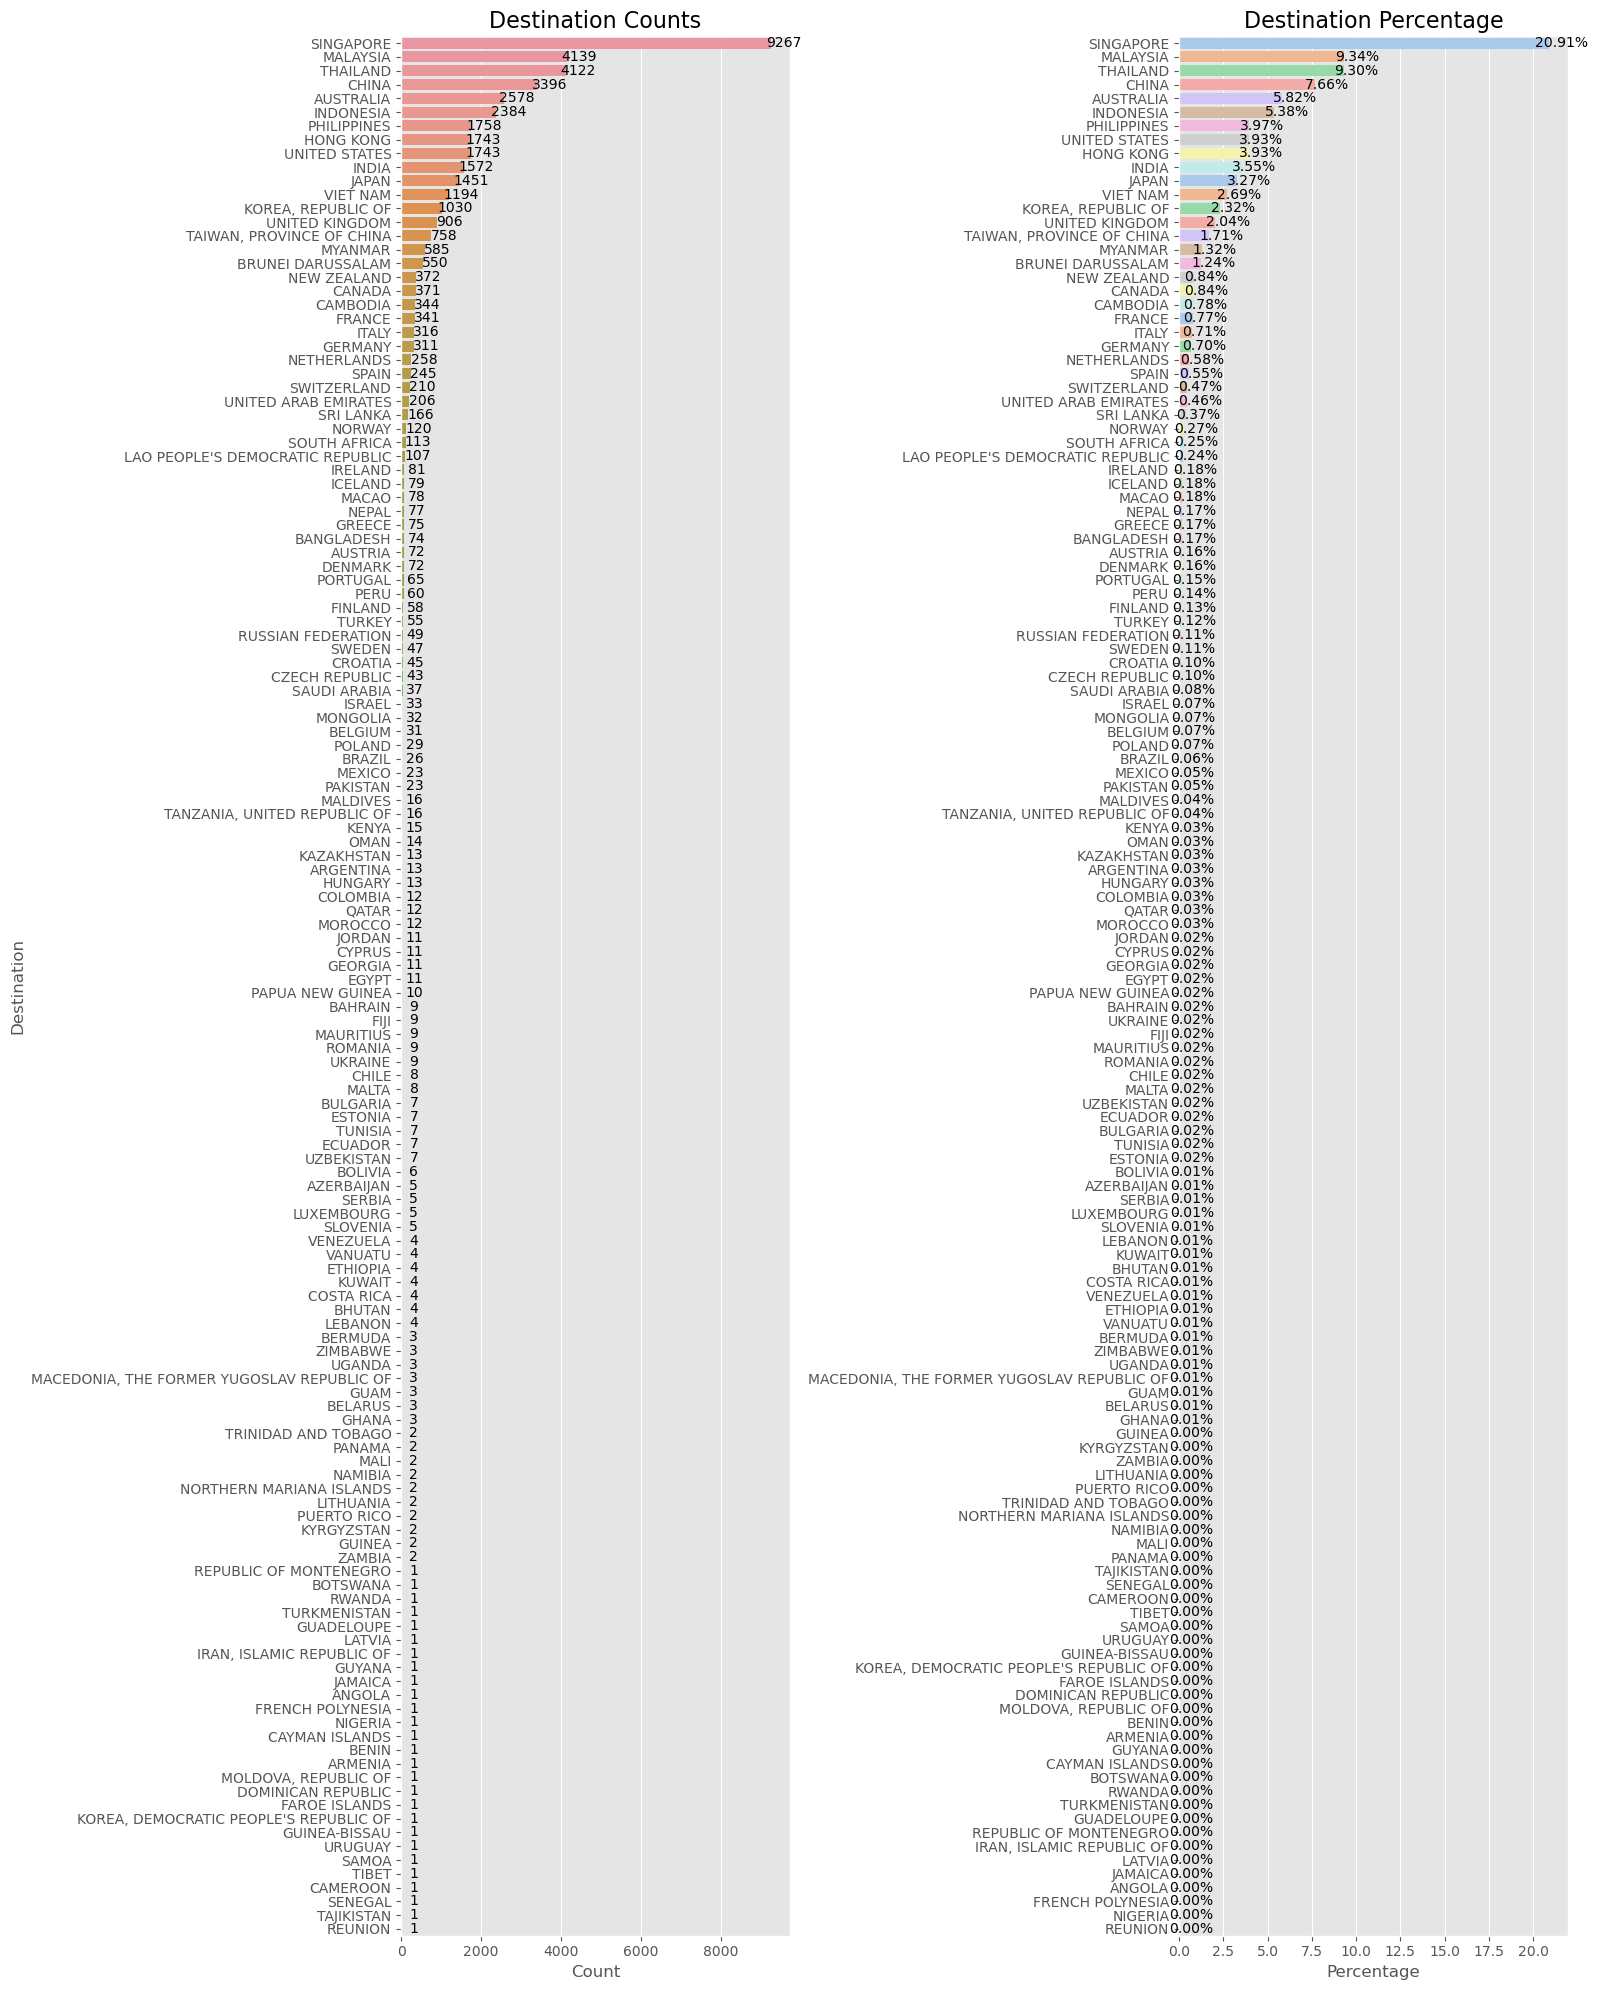

In [15]:
# Categorical destination

# Create subplots & Setting size of figure
fig, axes = plt.subplots(1, 2, figsize=(16, 20))

# Sort the data based on counts
sorted_data = data['Destination'].value_counts().sort_values(ascending=False)

# Plotting bar plot for counts
sns.countplot(y='Destination', data=data, order=sorted_data.index, ax=axes[0])
axes[0].set_title('Destination Counts', fontsize=16)
axes[0].set_xlabel('Count', fontsize=12)
axes[0].set_ylabel('Destination')

# Function to annotate bars for counts
def annotate_bars_counts(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.0f'), 
                     (p.get_width(), p.get_y() + p.get_height() / 2.), 
                     va = 'center', ha = 'center', 
                     xytext = (9, 0), 
                     textcoords = 'offset points')

# Annotate bars in the count plot
annotate_bars_counts(axes[0])

# Plotting percentage plot
total_destinations = len(data['Destination'])
destination_percentage = data['Destination'].value_counts(normalize=True) * 100

sns.barplot(y=destination_percentage.index, x=destination_percentage.values, ax=axes[1], palette='pastel')
axes[1].set_title('Destination Percentage', fontsize=16)
axes[1].set_xlabel('Percentage', fontsize=12)
axes[1].set_ylabel('')

# Function to annotate bars for percentage
def annotate_bars_percentage(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}%', 
                     (p.get_width(), p.get_y() + p.get_height() / 2.), 
                     va = 'center', ha = 'center', 
                     xytext = (9, 0), 
                     textcoords = 'offset points')

# Annotate bars in the percentage plot
annotate_bars_percentage(axes[1])

# Displaying the plots
plt.tight_layout()
plt.show()


Based on the graphs above, we can get some insights such as,
* Majority of policeholders have enrolled with the EPX travel agency.
* Most of policeholders prefer to have travel agency as their partner than the airlines.
* The substantial number of travel insurance agencies have online distribution channels and very few of them having offline distribution channel in online mode.
* The number of male as policyholders is slightly higher than female.
* Majority of customers do not claim or do not eliglible for claiming the insurance
* Singapore, Malaysia, Thailand, China, and Australia are the top 5 destinations that account for more than half (53%) of overall destinations.


## **4. Data Cleaning, Feature Selection, and Feature Engineering**

**Data Cleaning**

Data cleaning is performed to check and to handle any missing values and anomalies that present in our dataset that can disrupt the machine learning model. Based on our observation, we have some missing values and anomalies in the dataset. We will try to handle them, so the data will be ready for analysis and machine learning model.   

### **Checking and handling Anomaly**

In [16]:
# Checking anomaly - Duration
anomaly_duration = data[data['Duration'] < 0]
anomaly_duration

Agency Agency Type Distribution Channel Product Name Gender  Duration  \
26228    JZI    Airlines               Online   Basic Plan    NaN        -1   
26494    JZI    Airlines               Online   Basic Plan    NaN        -1   

             Destination  Net Sales  Commision (in value)  Age Claim  
26228           MALAYSIA       18.0                   6.3  118    No  
26494  BRUNEI DARUSSALAM       18.0                   6.3  118    No

it is impossible for the duration of the trip to be minus or negative. So we, will eliminate it

In [17]:
# Handling anomaly - Duration
data = data.drop(anomaly_duration.index).reset_index(drop=True)

In [18]:
anomaly_duration = data[data['Duration'] < 0]
anomaly_duration

Empty DataFrame
Columns: [Agency, Agency Type, Distribution Channel, Product Name, Gender, Duration, Destination, Net Sales, Commision (in value), Age, Claim]
Index: []

In [19]:
# Taking all dataset and Dropping rows with anomaly where 'net sales' is less than 0, as we do
data = data[data['Net Sales'] >= 0].reset_index(drop=True)

### **Checking and Handling Missing Values**

**Checking Missing Values**

In [20]:
# Calculating the overall missing values in the dataframe
data.isnull().sum().sum()

31228

In [21]:
# Calculating missing value from every columns
pd.DataFrame({'Missing values': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

Missing values
Agency                             0
Agency Type                        0
Distribution Channel               0
Product Name                       0
Gender                         31228
Duration                           0
Destination                        0
Net Sales                          0
Commision (in value)               0
Age                                0
Claim                              0

In [22]:
# Calculating the percentage of missing values from every columns
df_miss_percent = data.isna().sum()* 100/len(data)  
df_miss_percent.to_frame().rename(columns={0:'Percentage of Missing values'})


Percentage of Missing values
Agency                                    0.000000
Agency Type                               0.000000
Distribution Channel                      0.000000
Product Name                              0.000000
Gender                                   71.226878
Duration                                  0.000000
Destination                               0.000000
Net Sales                                 0.000000
Commision (in value)                      0.000000
Age                                       0.000000
Claim                                     0.000000

We have found missing values in the column of 'Gender' and the quantity of missing is higher than 70%. Now, we want to see the relationship of the missing value with another features (by using missingno library) to find for more information and decide what should we do with missing values.

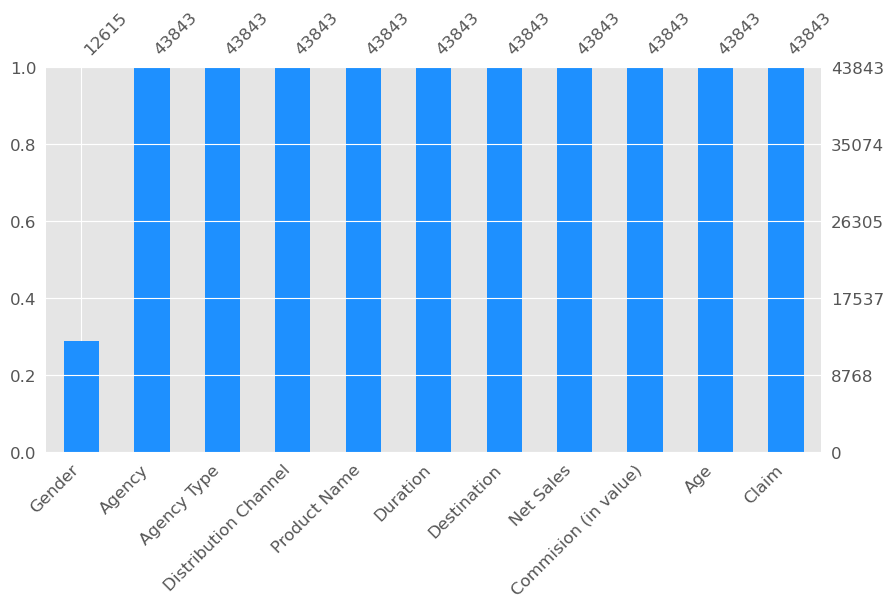

In [23]:
missingno.bar(data,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.show()

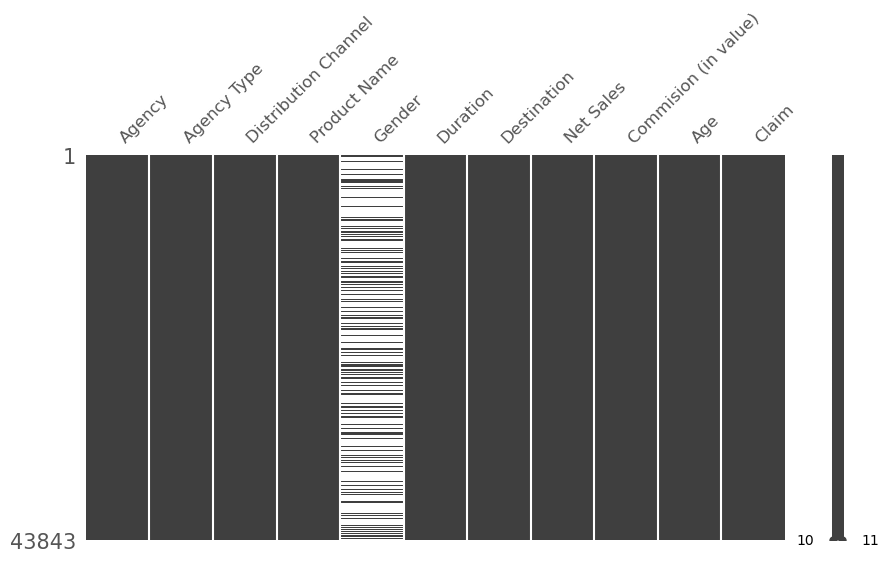

In [24]:
missingno.matrix(data, figsize=(10,5), fontsize=12)
plt.show()

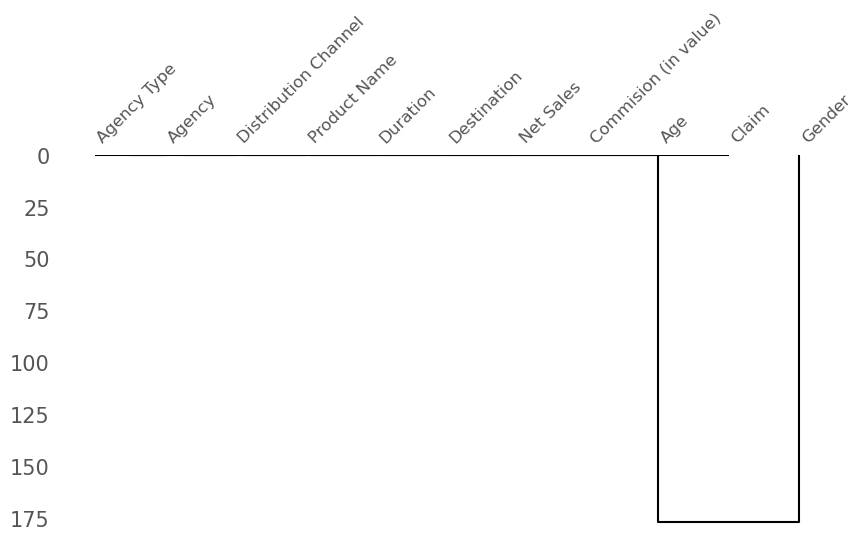

In [25]:
missingno.dendrogram(data, figsize=(10,5), fontsize=12)
plt.show()

* Based on the bar plot and matrix (missingno), the 'Gender' feature only contains about 25% of overall data. 
* According to the dendogram (missingno), there might be a relationship between feature of 'Gender' and 'Age'. So, we decide to breakdown the 'Age' by interval of ten years.

In [26]:
pd.DataFrame({
    'age_range':['10-19', '20-29', '30-39', '40-49', '50 or above'],
    'missing_values':[
        data[(data['Age']>=10) & (data['Age']<20)]['Gender'].isna().sum(),
        data[(data['Age']>=20) & (data['Age']<30)]['Gender'].isna().sum(),
        data[(data['Age']>=30) & (data['Age']<40)]['Gender'].isna().sum(),
        data[(data['Age']>=40) & (data['Age']<50)]['Gender'].isna().sum(),
        data[(data['Age']>=50)]['Gender'].isna().sum(),
    ]
})

age_range  missing_values
0        10-19              25
1        20-29            2705
2        30-39           21856
3        40-49            3684
4  50 or above            2958

The majority of missing values are from age range of 30-39. However, there is no clear information for the relationship of between missing values of 'Gender' and 'Age'. 

As we do not find sufficient information for missing values and in order to not discriminate treatment between gender (in our model), so we decide to drop the feature of 'Gender' from our dataset.

**Dropped columns**

In [27]:
# Deleting the 'gender' column 
data = data.drop(columns=["Gender"])

In [28]:
# Re-checking missing value from every columns
pd.DataFrame({'Missing values': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

Missing values
Agency                             0
Agency Type                        0
Distribution Channel               0
Product Name                       0
Duration                           0
Destination                        0
Net Sales                          0
Commision (in value)               0
Age                                0
Claim                              0

### **Checking and Handling duplicates**

**Checking Duplicated data**

In [29]:
# Number of data before dropping duplicates
data.shape

(43843, 10)

In [30]:
# Checking for duplicated data
print(f"Total number of duplicated data: {data.duplicated().sum()}")
print(f"Percentage of duplicated data: {data.duplicated().sum()/len(data)*100:.2f}%")

Total number of duplicated data: 4999
Percentage of duplicated data: 11.40%


**Handling duplicated data**

In [31]:
# Handling duplicated data
data = data.drop_duplicates()

# Number of data after dropping duplicates
data.shape

(38844, 10)

### **Checking and handling outliers**

**Recognizing outliers**

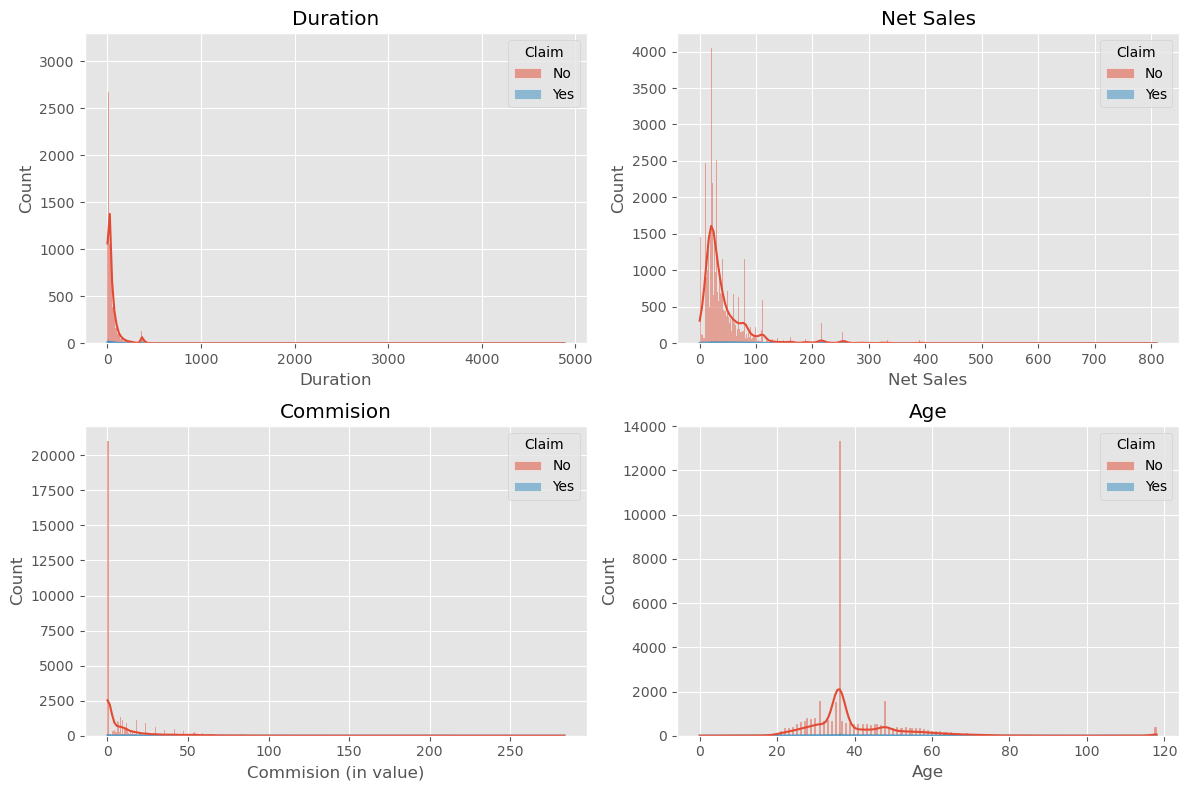

In [32]:
# Visualizing outliers
plt.figure(figsize=(12,8))

plt.subplot(221)
sns.histplot(data, x='Duration', hue='Claim', kde=True)
plt.title('Duration')

plt.subplot(222)
sns.histplot(data, x='Net Sales', hue='Claim', kde=True)
plt.title('Net Sales')

plt.subplot(223)
sns.histplot(data, x='Commision (in value)', hue='Claim', kde=True)
plt.title('Commision')

plt.subplot(224)
sns.histplot(data, x='Age', hue='Claim', kde=True)
plt.title('Age')

plt.tight_layout()
plt.show()

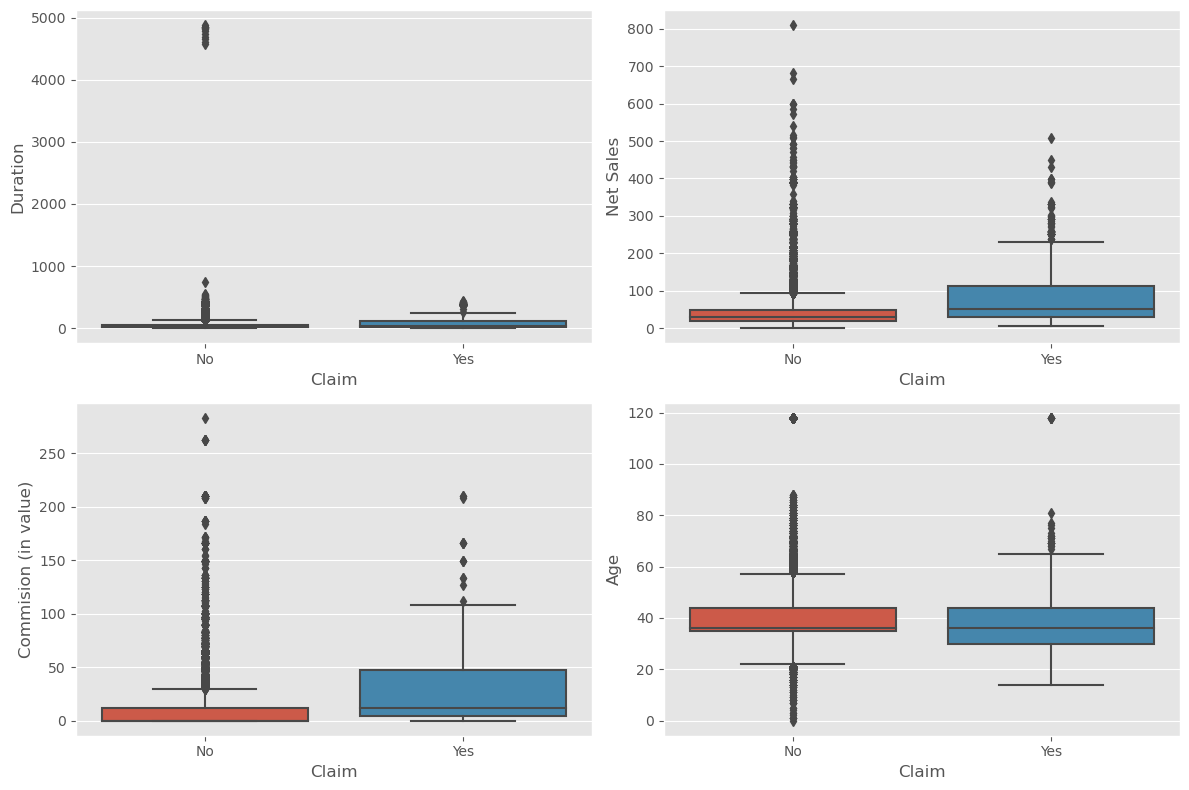

In [33]:
# Box plot to visualize outliers
plt.figure(figsize=(12,8))

plt.subplot(221)
sns.boxplot(data, y='Duration', x='Claim')

plt.subplot(222)
sns.boxplot(data, y='Net Sales', x='Claim')

plt.subplot(223)
sns.boxplot(data, y='Commision (in value)', x='Claim')

plt.subplot(224)
sns.boxplot(data, y='Age', x='Claim')

plt.tight_layout()
plt.show()

In [34]:
# Calculating outliers and their percentage in features
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

numerical = [var for var in data.columns if data[var].dtypes != 'object']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

Column  Total Outliers  Percentage (%)  Lower Bound  \
0              Duration            3447            8.87       -56.50   
1             Net Sales            3218            8.28       -25.50   
2  Commision (in value)            3881            9.99       -17.82   
3                   Age            3693            9.51        21.50   

   Upper Bound  
0        123.5  
1         95.3  
2         29.7  
3         57.5

We recognize that our dataset contain outliers. We have found outliers on numerical columns by percentage from 8.28% to 9.51%. However, we do not want to delete all outliers. We decide to handle outliers based on some references of the travel insurance industry (utilizing some domain knowledge of the industry).

**Handling outliers**

* According to a travel insurance website, there is usually age limit for customers to apply for travel insurances. Based on this [source](https://www.allianz-assistance.com.sg/blog/How-Age-May-Impact-Your-Travel-Insurance-Needs.html), most polices will cover up to the age limit of 75. So, we decide to get rid the outliers above 75.
* In addition, in general travel insurance can offer up to a year of cover according to this [source](https://www.gocompare.com/travel-insurance/). Interestingly, there some insurance who can cover longer than the usual time (e.g., up to 18 months), but thats not common. So, we wont include it. Finally, we will delete outlier of duration than more than 365 days.

In [35]:
# Data anomaly with age more than 75
data[data['Age']>75]

Agency    Agency Type Distribution Channel  \
98       ART       Airlines               Online   
104      JZI       Airlines              Offline   
186      TST  Travel Agency              Offline   
311      CSR  Travel Agency              Offline   
358      JWT       Airlines               Online   
...      ...            ...                  ...   
43373    JWT       Airlines               Online   
43443    JWT       Airlines               Online   
43604    JWT       Airlines               Online   
43655    JWT       Airlines               Online   
43827    LWC  Travel Agency               Online   

                            Product Name  Duration Destination  Net Sales  \
98                            Value Plan         7    MALAYSIA       29.0   
104                           Basic Plan        16   INDONESIA       37.0   
186                Travel Cruise Protect        63    MALAYSIA       30.0   
311                   Comprehensive Plan       176    MALAYSIA       29.0   
358                           Value Plan        12       INDIA       39.0   
...                                  ...       ...         ...        ...   
43373                         Value Plan        10       INDIA       50.0   
43443                         Value Plan        83       INDIA      180.0   
43604                         Value Plan        42       INDIA       31.0   
43655                         Value Plan        84       INDIA       93.0   
43827  Single Trip Travel Protect Silver        11       CHINA       49.5   

       Commision (in value)  Age Claim  
98                    10.15  118    No  
104                   12.95  118    No  
186                   10.50   76    No  
311                    9.57   76    No  
358                   15.60  118    No  
...                     ...  ...   ...  
43373                 20.00  118   Yes  
43443                 72.00  118    No  
43604                 12.40  118    No  
43655                 37.20  118    No  
43827                 32.18   84    No  

[579 rows x 10 columns]

In [36]:
# Taking all dataset and Dropping rows where age > 75
data = data[data['Age'] <= 75].reset_index(drop=True)

In [37]:
# Rows with duration more than 365 days
data[data['Duration']>365]


Agency    Agency Type Distribution Channel  \
13       C2B       Airlines               Online   
50       LWC  Travel Agency               Online   
53       C2B       Airlines               Online   
87       SSI       Airlines               Online   
219      TTW  Travel Agency              Offline   
...      ...            ...                  ...   
38114    C2B       Airlines               Online   
38171    C2B       Airlines               Online   
38177    C2B       Airlines               Online   
38183    C2B       Airlines               Online   
38219    C2B       Airlines               Online   

                        Product Name  Duration Destination  Net Sales  \
13                Annual Silver Plan       376   SINGAPORE     252.85   
50        Annual Travel Protect Gold       370       CHINA     204.60   
53                Annual Silver Plan       366   SINGAPORE     216.00   
87                  Ticket Protector      4736   SINGAPORE       0.32   
219    Individual Comprehensive Plan       368   SINGAPORE      97.00   
...                              ...       ...         ...        ...   
38114             Annual Silver Plan       400   SINGAPORE     252.85   
38171               Annual Gold Plan       378   SINGAPORE     333.00   
38177             Annual Silver Plan       382   SINGAPORE     216.00   
38183             Annual Silver Plan       390   SINGAPORE     301.00   
38219               Annual Gold Plan       370   SINGAPORE     333.00   

       Commision (in value)  Age Claim  
13                    63.21   43   Yes  
50                   132.99   39   Yes  
53                    54.00   37    No  
87                     0.09   48    No  
219                    0.00   37    No  
...                     ...  ...   ...  
38114                 63.21   30    No  
38171                 83.25   47    No  
38177                 54.00   38    No  
38183                 75.25   48   Yes  
38219                 83.25   40    No  

[852 rows x 10 columns]

In [38]:
# Taking all dataset and Dropping rows with anomaly where duration more than 365 days
data = data[data['Duration'] <= 365].reset_index(drop=True)

### **Multicolinearity Check**

In [40]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

In [41]:
vif_df = calculate_vif(data[numerical])
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(data[numerical].drop(columns=dropped_columns))

In [42]:
vif_df

Feature       VIF
1             Net Sales  3.424214
3                   Age  2.061769
2  Commision (in value)  1.959678
0              Duration  1.889018

In [43]:
dropped_columns

[]

Based on the calculation of variance inflation factor, our dataset do not have features that have high value more than 10. It means our features do not have high multicolinearity that can disrupt our machine learning models. 

### **Reviewing Cardinality**

We also need to check cardinality of our features, because higher cardinality will affect our machine learning models by increasing complexity and potentially lead to overfitting.

In [44]:
categorical = [var for var in data.drop(columns='Claim').columns if data[var].dtypes == 'object']

In [45]:
# Checking cardinality

# creating a function to check cardinality
def check_cardinality(data):
    cardinality_info = []

    for feature in data.select_dtypes(include='object').columns:
        cardinality = len(data[feature].unique())
        warning = "High" if cardinality > 10 else "Low"
        cardinality_info.append({'Feature': feature, 'Cardinality': cardinality, 'Warning': warning})

    return pd.DataFrame(cardinality_info)

cardinality_data = check_cardinality(data)
cardinality_data

Feature  Cardinality Warning
0                Agency           15    High
1           Agency Type            2     Low
2  Distribution Channel            2     Low
3          Product Name           26    High
4           Destination          136    High
5                 Claim            2     Low

Based on the table above, we can see that we do have high cardinality in the features of 'Agency', 'Product Name', and 'Destination'. Since the higher number of unique values in these features can cause overfitting in our models, we want to simplify these features. For the feature of 'Destination' with uniques of 136, We will conduct binning for this columns by categorizing the countries destination according to region/continents. For the feature of 'Agency' and 'Product Name', we cannot make a binning as all of the Agencise and products are different from one and another. These uniques cannot be categorized or grouped according to their specific situation. 

### **Imbalance Data Check**

In [46]:
# Checking the imbalance data
# Check the class distribution 
from collections import Counter

print("Class distribution:", Counter(data['Claim']))

Class distribution: Counter({'No': 36841, 'Yes': 572})


In [47]:
data['Claim'].value_counts(normalize=True).to_frame()

proportion
Claim            
No       0.984711
Yes      0.015289

Our data is having imbalance (between moderate imbalance and extreme imbalance, with tendency to extreme imbalance)

### **Removing Irrelevant Features**

Previously, we have removed two features consisting of 'Gender' as we find it irrelevant due to tendency for discrimination of our classification models. Furthermore, we will have to remove the 'Destination' feature as this feature contains very high cardinality and replace it to a new feature in the next step.

### **Generate new features**

For this step, We want to generate new feature that can replace the feature of 'Destination' (138 unique values). The high cardinality of this feature potentially disrupt our model to be less general and to be overfit. So, we are looking to for a way to decrease the cardinality of this feature. After carefully looking of the unique values in the feature, we know that the values contain the name of countries. So, we decide to categorize every country from the unique value of 'destination' based on their region or area group.

**Destination categorization**

In [48]:
# Modifying the 'Destination' feature to reduce cardinality

country_counts = data['Destination'].value_counts()

top_10_countries = country_counts.nlargest(10).index

# Replacing countries (outside top 10 countries) to 'others'
data['Destination'] = data['Destination'].apply(lambda x: x if x in top_10_countries else 'others')

In [49]:
# Reviewing the Destination_Countries
data['Destination'].value_counts().to_frame()

count
Destination         
others         10306
SINGAPORE       7272
THAILAND        3576
MALAYSIA        3082
CHINA           2864
AUSTRALIA       2362
INDONESIA       1996
UNITED STATES   1592
HONG KONG       1550
PHILIPPINES     1440
JAPAN           1373

In [50]:
print(f"The number of unique values in the feature of 'Destination':{data['Destination'].nunique()}")

The number of unique values in the feature of 'Destination':11


**Age Categorization**

We will categorize the 'Age' features to reduce the number of uniques. We will conduct categorization based on the age category from ministry of health [reference]('https://gaya.tempo.co/read/1724197/kategori-umur-balita-remaja-dan-dewasa-menurut-kemenkes-jangan-salah#:~:text=Klasifikasi%20Usia%20Menurut%20WHO&text=%2D%20Usia%20muda%3A%2025%2D44,pikun%3A%2075%2D90%20tahun') The grouping process of customer age can be seen as below 

 - Kids : 0 - 10 years old
 - Teenagers : 10 - 19 years old
 - Adults : 19 - 44 years old
 - Pre-elderly : 45 - 59 years old
 - Elderly : >=60 years old

In [51]:
# Generating new feature 'Age Group'

# Defining function for categorizing_age
def categorize_age(age):
    if age < 10:
        return 'kids'
    elif 10 <= age < 19:
        return 'teenagers'
    elif 19 <= age < 45:
        return 'adults'
    elif 45 <= age < 60:
        return 'pre-elderly'
    elif age >= 60:
        return 'elderly'
    else:
        return 'unknown'  # Optional: Handle unexpected cases


# Applying the funtion into the feature of 'Age' and generating feature of 'Age Group'
data['Age Group'] = data['Age'].apply(categorize_age)

# Removing column 'Age'
data = data.drop(columns=['Age'])


In [52]:
data['Age Group'].value_counts()

Age Group
adults         28496
pre-elderly     6877
elderly         1922
teenagers         96
kids              22
Name: count, dtype: int64

**Duration categorization**

We will categorize the duration of the trip into 4 categories as below
* 1-3 months: <= 90 days  
* 4-6 months: 91 - 180 days 
* 7-9 months:  181 - 270 days
* 10-12 months: 271 - 365 days
    

In [53]:
# Generating new feature 'Duration Group'

# Defining function for categorizing_duration
def categorize_duration(days):
    if days <= 90:  # 1-3 months
        return '1-3 months'
    elif 91 <= days <= 180:  # 4-6 months
        return '4-6 months'
    elif 181 <= days <= 270:  # 7-9 months
        return '7-9 months'
    elif 271 <= days <= 365:  # 10-12 months
        return '10-12 months'
    else:
        return 'unknown'  # Optional: Handle unexpected cases

# Applying the funtion into the feature of 'Duration' and generating feature of 'Duration Group'
data['Duration Group'] = data['Duration'].apply(categorize_duration)

# Removing column 'Duration'
data = data.drop(columns=['Duration'])


In [54]:
data.head()

Agency    Agency Type Distribution Channel              Product Name  \
0    C2B       Airlines               Online        Annual Silver Plan   
1    EPX  Travel Agency               Online         Cancellation Plan   
2    JZI       Airlines               Online                Basic Plan   
3    EPX  Travel Agency               Online  2 way Comprehensive Plan   
4    C2B       Airlines               Online               Bronze Plan   

     Destination  Net Sales  Commision (in value) Claim    Age Group  \
0      SINGAPORE      216.0                  54.0    No  pre-elderly   
1       MALAYSIA       10.0                   0.0    No       adults   
2         others       22.0                   7.7    No       adults   
3  UNITED STATES      112.0                   0.0    No  pre-elderly   
4      SINGAPORE       16.0                   4.0    No       adults   

  Duration Group  
0   10-12 months  
1     1-3 months  
2     1-3 months  
3     1-3 months  
4     1-3 months

### **Feature Selection**

We will use all avalaible features, except feature of 'Gender' as the use this feature will potentially causing discrimination of gender. To be noted, we have made some modification to the numerical features of 'Age' into categorical feature of 'Age Group' and numerical 'Duration' into categorical 'Duration group'. Furthermore, we have done binning to 'Destination' that reduce the uniques from 138 into 10 unique values. All of modification process of our features is being done to prevent curse of dimensionality from higher number of cardinality in our features. In overall, our features consist of 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Net Sales', 'Commision (in value)', 'Age Group', and 'Duration Group'.

## **5. Data Analysis**

Before continuing into modeling, we want to check the proportion of features to the respond variable or target.

### **Features vs Target**

For the purpose of analysis we will use the data before outlier handling/cleaning (features have not been modified) and the data after treatment (features have been modified) 

**Features with positive target ('Yes') before modification**

In [55]:
display(data_backup[data_backup['Claim'] == 'Yes'].describe(), data_backup[data_backup['Claim'] == 'Yes'].describe(include='O'))

Duration   Net Sales  Commision (in value)        Age
count  677.000000  677.000000            677.000000  677.00000
mean   106.769572   93.564934             25.918375   38.56130
std    140.313702   92.771300             32.363499   14.10006
min      2.000000    4.760000              0.000000   14.00000
25%     14.000000   29.000000              4.500000   30.00000
50%     35.000000   51.000000             12.130000   36.00000
75%    107.000000  112.000000             46.960000   44.00000
max    431.000000  507.000000            210.210000  118.00000

Agency Agency Type Distribution Channel Product Name Gender  \
count     677         677                  677          677    475   
unique     14           2                    2           22      2   
top       C2B    Airlines               Online  Bronze Plan      F   
freq      407         439                  666          162    254   

       Destination Claim  
count          677   677  
unique          35     1  
top      SINGAPORE   Yes  
freq           417   677

**Features with positive target ('Yes') after modification**

In [56]:
display(data[data['Claim'] == 'Yes'].describe(), data[data['Claim'] == 'Yes'].describe(include='O'))

Net Sales  Commision (in value)
count  572.000000            572.000000
mean    68.966976             18.624563
std     71.158518             25.612670
min      4.760000              0.000000
25%     27.000000              3.750000
50%     44.000000              9.115000
75%     76.350000             22.130000
max    507.000000            210.210000

Agency Agency Type Distribution Channel Product Name Destination Claim  \
count     572         572                  572          572         572   572   
unique     12           2                    2           20          11     1   
top       C2B    Airlines               Online  Bronze Plan   SINGAPORE   Yes   
freq      321         349                  565          159         330   572   

       Age Group Duration Group  
count        572            572  
unique         4              4  
top       adults     1-3 months  
freq         435            478

**Features with negative class target ('No') before modification**

In [57]:
display(data_backup[data_backup['Claim'] == 'No'].describe(), data_backup[data_backup['Claim'] == 'No'].describe(include='O'))

Duration     Net Sales  Commision (in value)           Age
count  43651.000000  43651.000000          43651.000000  43651.000000
mean      48.534902     39.728734              9.456274     39.946760
std      108.363652     47.192803             19.255640     13.951776
min       -1.000000   -357.500000              0.000000      0.000000
25%        9.000000     18.000000              0.000000     35.000000
50%       22.000000     26.000000              0.000000     36.000000
75%       52.000000     47.000000             10.500000     43.000000
max     4881.000000    810.000000            283.500000    118.000000

Agency    Agency Type Distribution Channel       Product Name Gender  \
count   43651          43651                43651              43651  12206   
unique     16              2                    2                 26      2   
top       EPX  Travel Agency               Online  Cancellation Plan      M   
freq    24523          31875                42906              12948   6283   

       Destination  Claim  
count        43651  43651  
unique         138      1  
top      SINGAPORE     No  
freq          8850  43651

**Features with negative class target ('No') after modification**

In [58]:
display(data[data['Claim'] == 'No'].describe(), data[data['Claim'] == 'No'].describe(include='O'))

Net Sales  Commision (in value)
count  36841.000000          36841.000000
mean      38.624279              8.514493
std       36.955746             16.617352
min        0.000000              0.000000
25%       19.000000              0.000000
50%       28.000000              0.000000
75%       49.000000             10.500000
max      682.000000            262.760000

Agency    Agency Type Distribution Channel       Product Name  \
count   36841          36841                36841              36841   
unique     15              2                    2                 26   
top       EPX  Travel Agency               Online  Cancellation Plan   
freq    20671          27156                36284              10892   

       Destination  Claim Age Group Duration Group  
count        36841  36841     36841          36841  
unique          11      1         5              4  
top         others     No    adults     1-3 months  
freq         10219  36841     28061          32492

There are some insights that we get based on previous table above:
* Customers in the agency of C2B are the customer who are more likely to claim. In contrast, customers from EPX are the customers who are more likely to not claim their insurance.
* Customers from agency type of airlines are the customer who are more likely to claim than agency type of travel agency.
* The destination of 'Singapore' has the highest number of customers who claim. In contrast, the customers with destination of 'Others' or other countries outside the top ten countries more likely not to claim.
* The insurance product ('Product Name') of 'Bronze plan' has the highest number of customers who claim. Oppositely, the insurance product of 'Cancellation Plan' has the highest number of customers who do not claim their insurance.   

### **Numerical features vs Target**



In [39]:
proportion = []
indeces = []

for i, row in outlier_df.iterrows():
    outlier = data[(data[row['Column']] < row['Lower Bound']) | (data[row['Column']] > row['Upper Bound'])]
    percentages = (outlier['Claim'].value_counts(normalize=True)*100).values
    proportion.append(percentages)
    indeces.append(row['Column'])

pd.DataFrame(proportion, columns=['Not Claim', 'Claim'], index=indeces)

Not Claim     Claim
Duration              97.488226  2.511774
Net Sales             95.507060  4.492940
Commision (in value)  96.523793  3.476207
Age                   98.063439  1.936561

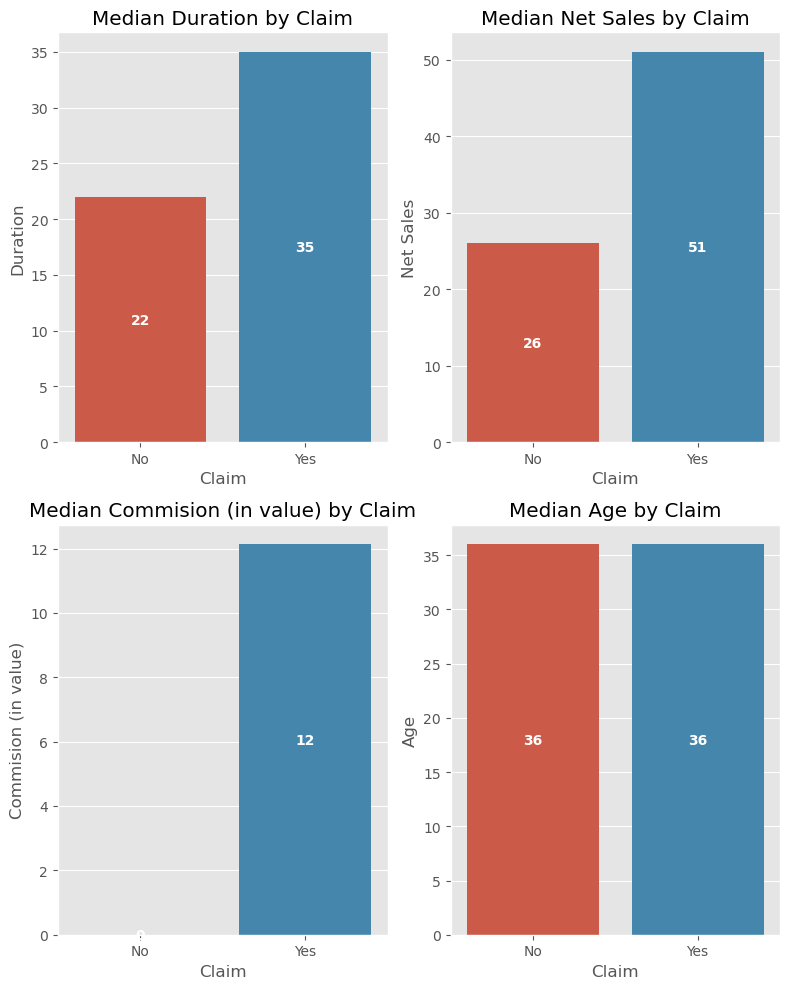

In [59]:
# Numerical features vs Target

# Setting numerical column
numerical = data_backup.select_dtypes(include=[np.number]).columns

# Setting up size of the plot
fig, axes = plt.subplots(2, 2, figsize=(8, 10))

# Loop over each numerical column
for col, ax in zip(numerical, axes.flatten()):
    # Create the barplot
    barplot = sns.barplot(data=data_backup, y=col, x='Claim', estimator=np.median, ci=None, ax=ax)
    
    # Add annotations
    for p in barplot.patches:
        value = f'{int(p.get_height())}'  # Convert height to integer and string
        ax.annotate(value,
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                    ha='center', va='center',
                    color='white', fontsize=10, fontweight='bold')
    
    ax.set_title(f'Median {col} by Claim')

plt.tight_layout()
plt.show()


Because our numerical data are not normally distributed and contain outliers, so we are using median to display our data 

The insights from the bar plot above,
* The customers who have claimed their insurance have the higher number of days in the travel duration than the customers who don't claim their insurance.
* The customers who have claimed their insurance have contributed two times higher to the 'Net Sales' that the customers who don't claim their insurance.
* Without claim, most of the times, comission will not be delivered.
* There is no different in median between people who have claim and have not claim their insurance.

### **Categorical features vs Target**

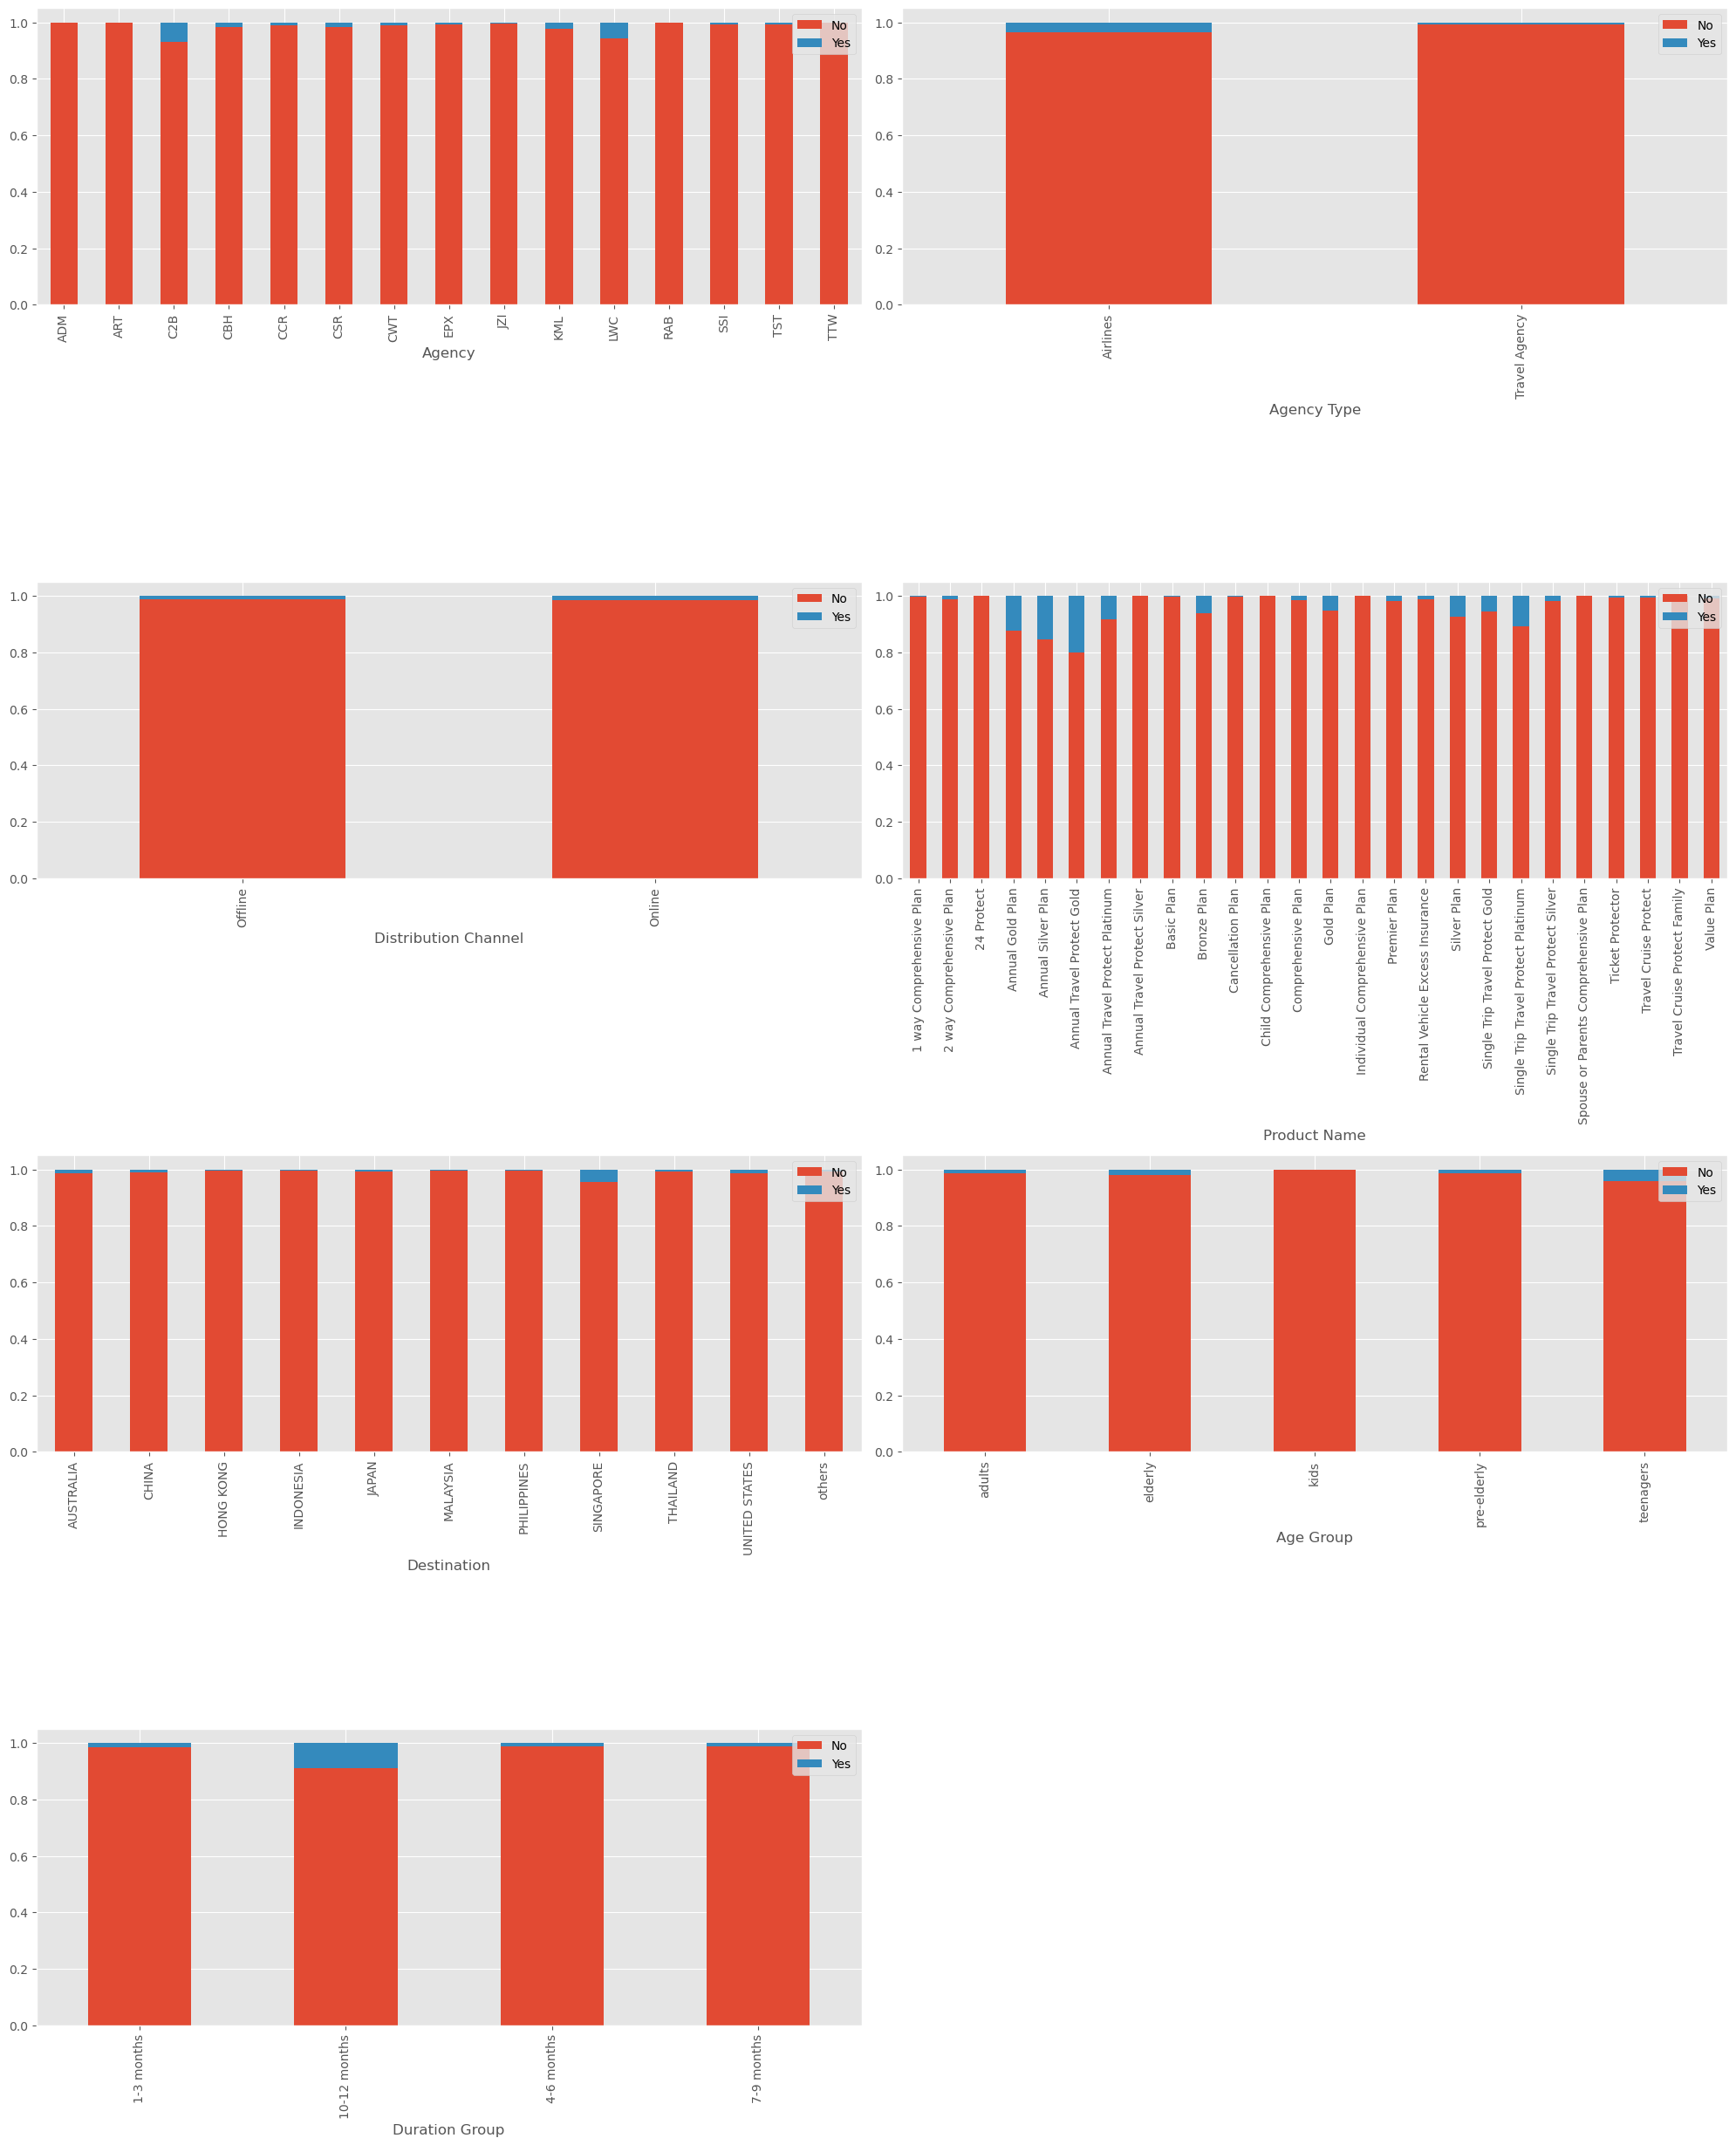

In [60]:
# Visualizing claim proportion of categorical features
count = 0
fig = plt.figure(figsize=(20,30))

for i in data.drop(columns=['Commision (in value)', 'Net Sales', 'Claim']).columns:
    count += 1
    ax = plt.subplot(5, 2, count)
    pd.crosstab(data[i], data['Claim'], normalize=0).plot(kind='bar', stacked=True, ax=ax)
    ax.legend(loc='upper right')  # Position the legend in the upper right corner
    fig.tight_layout()

plt.show()

In [61]:
# Creating function for plotting categorical features
def create_plot(data, col, x_maks=1000):

    agg_table = data.groupby([col, 'Claim']).size().unstack().reset_index()
    agg_table['total'] = agg_table['Yes']+agg_table['No']
    agg_table['% Claim'] = (agg_table['Yes']/agg_table['total']*100).round(2)
    agg_table = agg_table.sort_values(by='% Claim', ascending=False)
    agg_table

    fig, axes = plt.subplots(1, 2, figsize=(16,5))

    ax1 = sns.barplot(data=agg_table, y=col, x='% Claim', ax=axes[0])
    label = ['{:.1f} %'.format(x) for x in ax1.containers[0].datavalues]
    ax1.bar_label(ax1.containers[0], labels=label, padding=3, label_type='center')
    ax1.set_title(f'Percentage of Claim by {col}')

    ax2 = sns.countplot(data=data, y=col, hue='Claim', order=agg_table[col], ax=axes[1])
    ax2.set_title(f'Number of customer by {col} and claim')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)

    plt.tight_layout()
    plt.show()

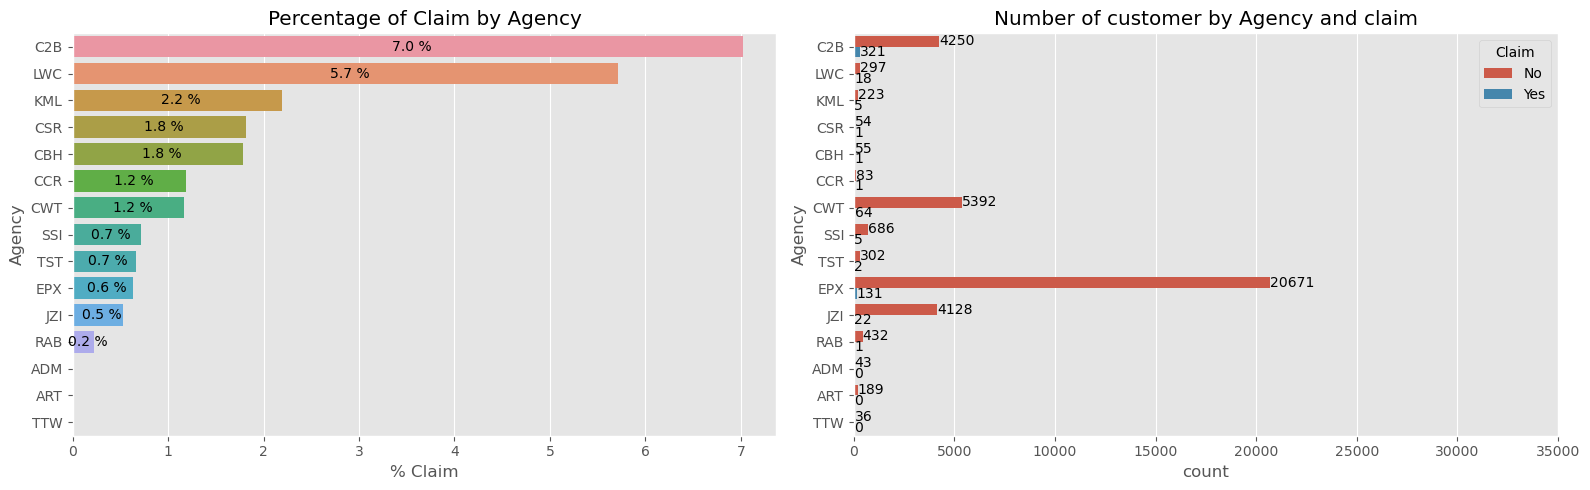

In [62]:
# Percentage and number of claim by 'Agency'
create_plot(data, 'Agency', x_maks=35000)

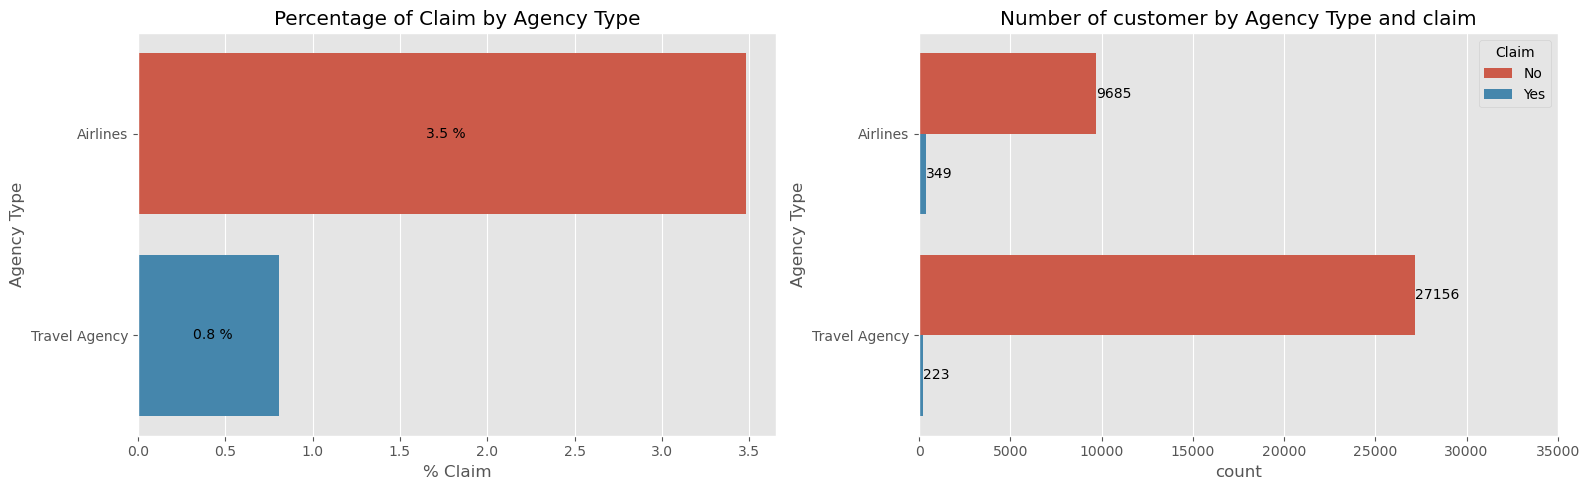

In [63]:
# Percentage and number of claim by 'Agency Type' 
create_plot(data, 'Agency Type', x_maks=35000)

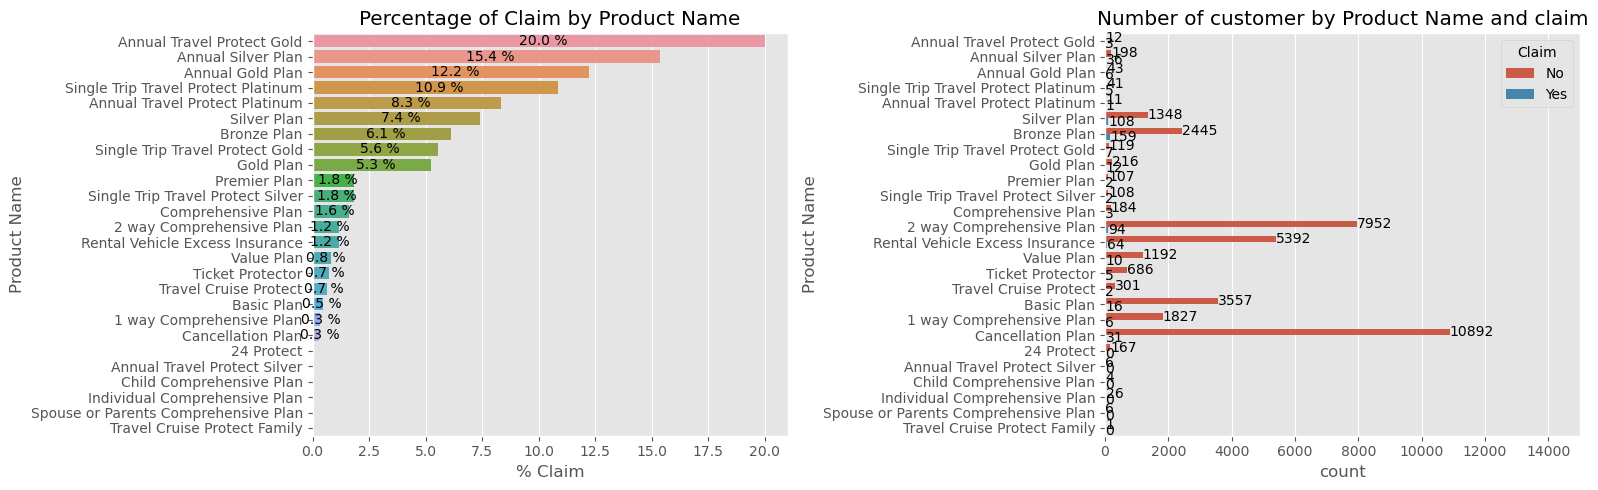

In [64]:
# Percentage and number of claim by 'Product Name' 
create_plot(data, 'Product Name', x_maks=15000)

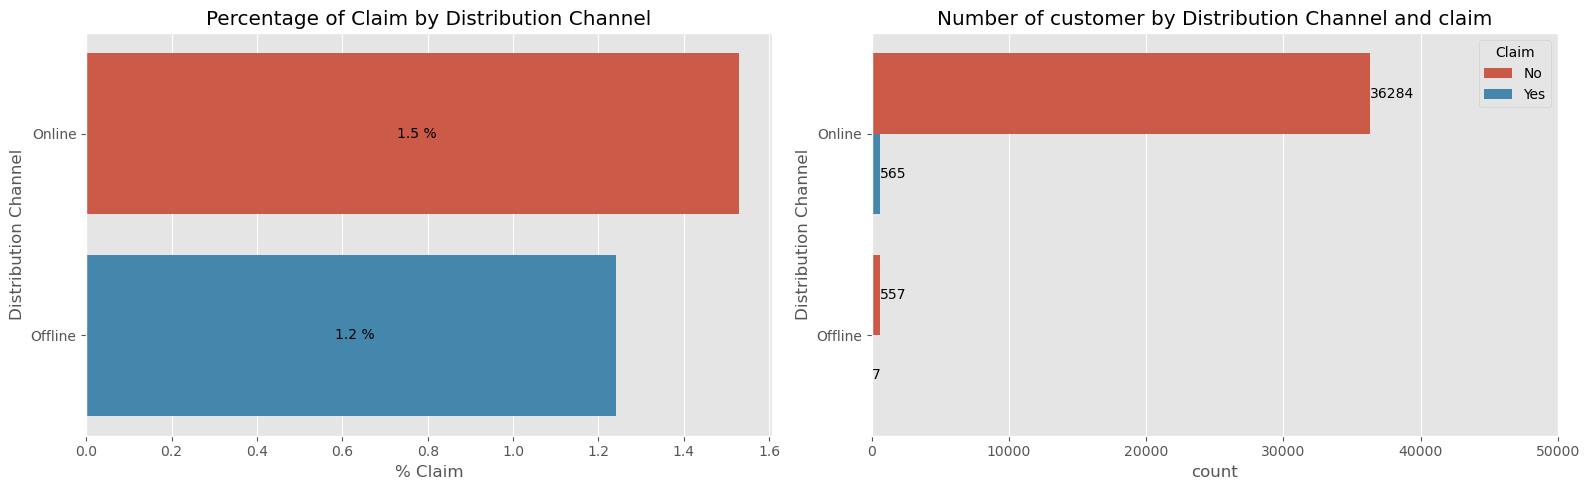

In [65]:
# Percentage and number of claim by 'Distribution Channel' 
create_plot(data, 'Distribution Channel', x_maks=50000)

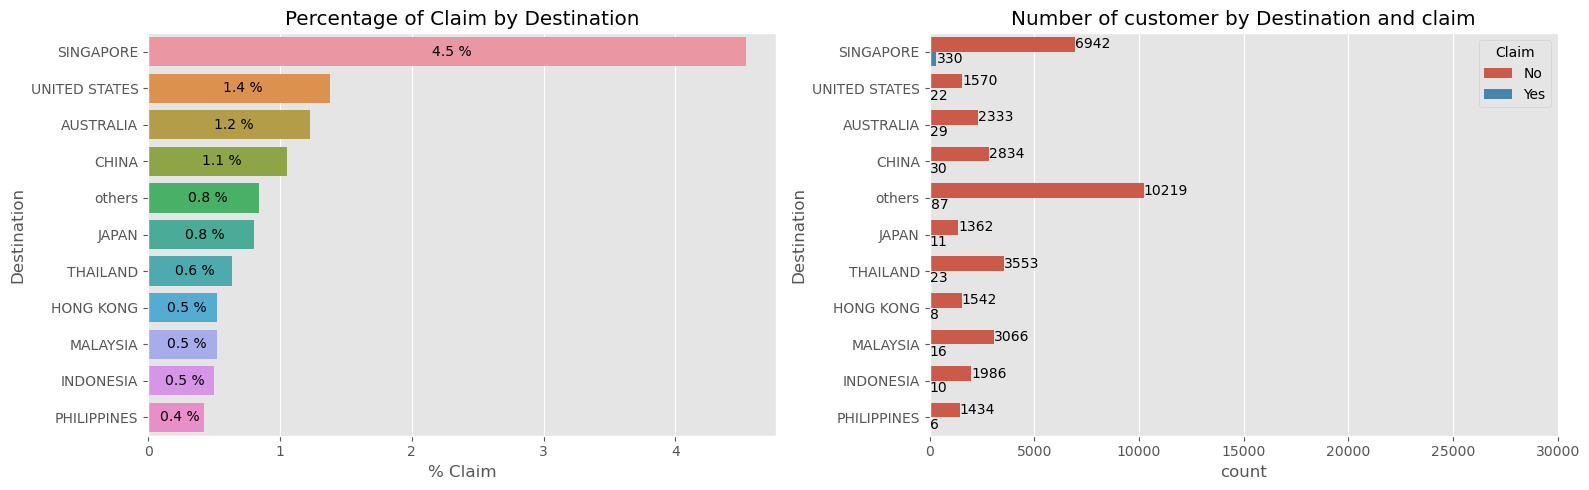

In [66]:
# Percentage and number of claim by 'Destination_Countries'
create_plot(data, 'Destination', x_maks=30000)

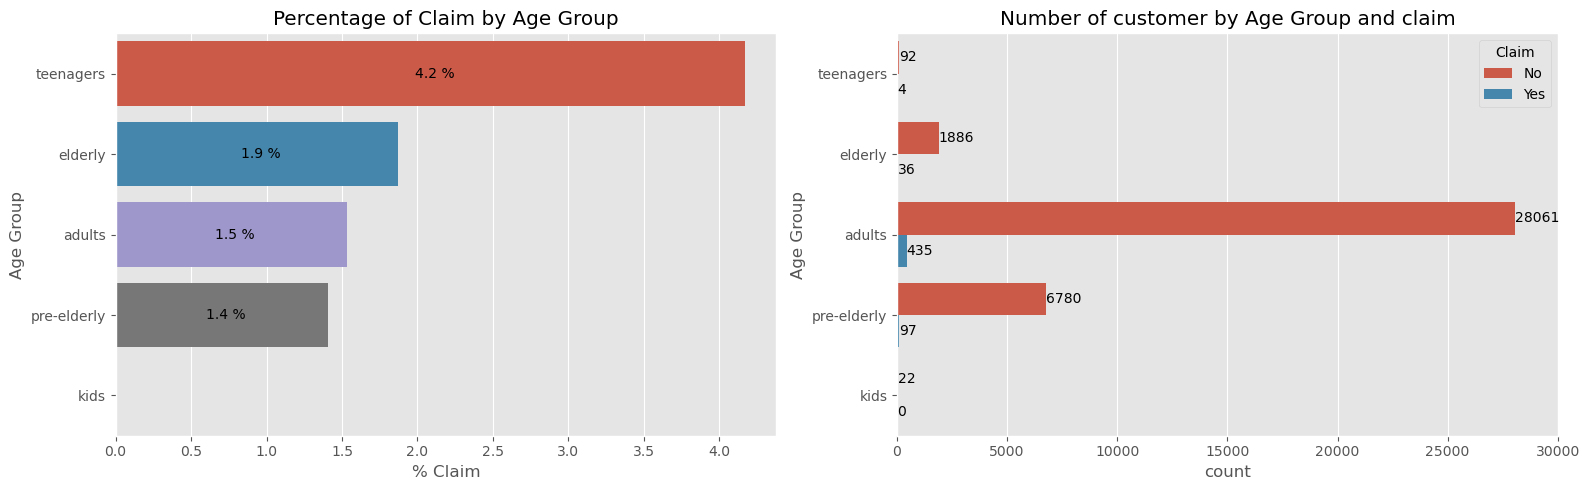

In [67]:
# Percentage and number of claim by 'Age Group'
create_plot(data, 'Age Group', x_maks=30000)

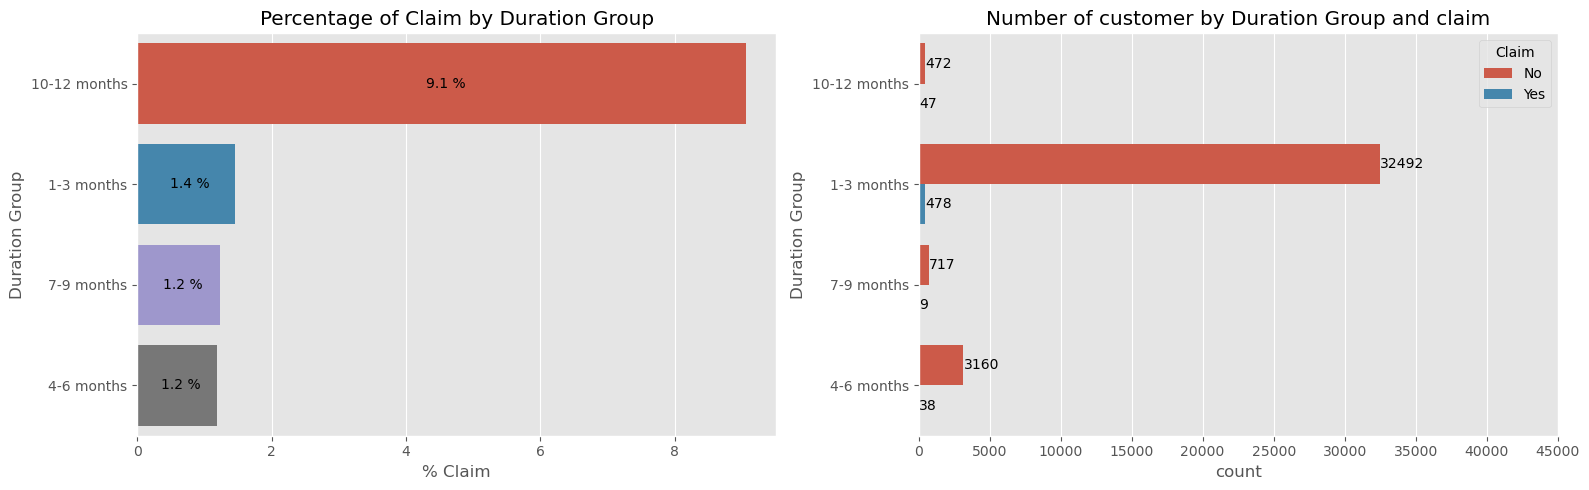

In [68]:
# Percentage and number of claim by 'Duration Group'
create_plot(data, 'Duration Group', x_maks=45000)


In [69]:
# Table of categorical feature vs target (claim)
for i in data.drop(columns=['Commision (in value)', 'Net Sales', 'Claim']).columns:
    categorical_claim_data = data.groupby(i)['Claim'].value_counts(normalize=True).unstack()
    display(categorical_claim_data.sort_values(by=['Yes'], ascending=False))

Claim         No       Yes
Agency                    
C2B     0.929775  0.070225
LWC     0.942857  0.057143
KML     0.978070  0.021930
CSR     0.981818  0.018182
CBH     0.982143  0.017857
CCR     0.988095  0.011905
CWT     0.988270  0.011730
SSI     0.992764  0.007236
TST     0.993421  0.006579
EPX     0.993703  0.006297
JZI     0.994699  0.005301
RAB     0.997691  0.002309
ADM     1.000000       NaN
ART     1.000000       NaN
TTW     1.000000       NaN

Claim                No       Yes
Agency Type                      
Airlines       0.965218  0.034782
Travel Agency  0.991855  0.008145

Claim                       No       Yes
Distribution Channel                    
Online                0.984667  0.015333
Offline               0.987589  0.012411

Claim                                       No       Yes
Product Name                                            
Annual Travel Protect Gold            0.800000  0.200000
Annual Silver Plan                    0.846154  0.153846
Annual Gold Plan                      0.877551  0.122449
Single Trip Travel Protect Platinum   0.891304  0.108696
Annual Travel Protect Platinum        0.916667  0.083333
Silver Plan                           0.925824  0.074176
Bronze Plan                           0.938940  0.061060
Single Trip Travel Protect Gold       0.944444  0.055556
Gold Plan                             0.947368  0.052632
Premier Plan                          0.981651  0.018349
Single Trip Travel Protect Silver     0.981818  0.018182
Comprehensive Plan                    0.983957  0.016043
Rental Vehicle Excess Insurance       0.988270  0.011730
2 way Comprehensive Plan              0.988317  0.011683
Value Plan                            0.991681  0.008319
Ticket Protector                      0.992764  0.007236
Travel Cruise Protect                 0.993399  0.006601
Basic Plan                            0.995522  0.004478
1 way Comprehensive Plan              0.996727  0.003273
Cancellation Plan                     0.997162  0.002838
24 Protect                            1.000000       NaN
Annual Travel Protect Silver          1.000000       NaN
Child Comprehensive Plan              1.000000       NaN
Individual Comprehensive Plan         1.000000       NaN
Spouse or Parents Comprehensive Plan  1.000000       NaN
Travel Cruise Protect Family          1.000000       NaN

Claim                No       Yes
Destination                      
SINGAPORE      0.954620  0.045380
UNITED STATES  0.986181  0.013819
AUSTRALIA      0.987722  0.012278
CHINA          0.989525  0.010475
others         0.991558  0.008442
JAPAN          0.991988  0.008012
THAILAND       0.993568  0.006432
MALAYSIA       0.994809  0.005191
HONG KONG      0.994839  0.005161
INDONESIA      0.994990  0.005010
PHILIPPINES    0.995833  0.004167

Claim              No       Yes
Age Group                      
teenagers    0.958333  0.041667
elderly      0.981270  0.018730
adults       0.984735  0.015265
pre-elderly  0.985895  0.014105
kids         1.000000       NaN

Claim                 No       Yes
Duration Group                    
10-12 months    0.909441  0.090559
1-3 months      0.985502  0.014498
7-9 months      0.987603  0.012397
4-6 months      0.988118  0.011882

There are some insights from some previous graphs and tables:
* C2B and LWC customers are most likely to make claim their travel insurance in comparison to other agencies.
* Customers using airlines as agency type are more likely to claim their insurance than travel agency.
* Insurance products of 'Annual Travel Protect Gold', 'Annual Silver Plan', and 'Annual Gold Plan' are the top product with customers who are more likely to claim their insurance.
* Customers who are using online distribution channel are more likely to claim their insurance than the offline distribution channel.
* Customers who are traveling to Southeast Asia regions (e.g., Singapore, Malaysia, Thailand) are more likely to claim the insurance than other destinations.
* Customers who are traveling with 'Duration Group' of 10-12 months are more likely to claim insurance than other duration group categories
.


## **6. Modelling**

### **Data Preparation**

In [70]:
# Copy
data_claim = data.copy()

**Replacing values**

Now we want to replace the content of 'Claim' column from 'Yes' and 'No' into 1 and 0. Because our main focus is the claim, so the target should be as

Target :

**0** : Not claiming insurance (`Claim` == 'No')

**1** : Claiming insurance (`Claim` == 'Yes')

In [71]:
# Replacing values
data_claim['Claim'] = np.where(data_claim['Claim']=='Yes',1,0)
data_claim['Claim'].unique()

array([0, 1])

Now, we have obeserved that the unique values of the 'Claim' have been converted into 1 and 0.

**Missing Values**

Now, we want to re-check missing values from every colums for preparation of machine learning.


In [72]:
# Re-checking missing value from every columns
pd.DataFrame({'Missing values': [data_claim[col].isna().sum() for col in data_claim.columns]}, index=data_claim.columns.values)


Missing values
Agency                             0
Agency Type                        0
Distribution Channel               0
Product Name                       0
Destination                        0
Net Sales                          0
Commision (in value)               0
Claim                              0
Age Group                          0
Duration Group                     0

### **Define feature and target**

After conducting preprocessing step, now lets define our features and target:

* **Features** : 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Net Sales', 'Commision (in value)', 'Age Group', 'Duration Group'
* **Target**   : 'Claim' 

In [73]:
# Define features and target
# Features
X = data_claim.drop(columns='Claim')

# target
y = data_claim['Claim']

In [74]:
X.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination', 'Net Sales', 'Commision (in value)', 'Age Group',
       'Duration Group'],
      dtype='object')

**Imbalance data check**

In [75]:
y.value_counts()

Claim
0    36841
1      572
Name: count, dtype: int64

In [76]:
y.value_counts(normalize=True)

Claim
0    0.984711
1    0.015289
Name: proportion, dtype: float64

### **Data Splitting**

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

### **Feature Engineering**

**Outlier Handling**

We use winsorizing method for handling outliers. This method works by limiting extreme values to reduce their impact. So, the method replaces extreme values with the nearest values that are not considered outliers, thereby reducing the influence of these extremes on statistical analyses.

In [78]:
def winsorize_with_pandas(s, limits):
    return s.clip(lower=s.quantile(limits[0]), 
                  upper=s.quantile(1-limits[1]))

In [79]:
# Outlier Handling
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from scipy.stats.mstats import winsorize
from typing import Literal


class handling_outliers(BaseEstimator, TransformerMixin):
    def _init_(self):
        pass

    def fit(self, X, y=None):
        self.feature_names_in_ = X.columns
        return self  
    
    def transform(self, X, y=None):
        data = X.copy()
        cols_to_winsorize = ['Commision (in value)']
        data[cols_to_winsorize] = data[cols_to_winsorize].apply(winsorize_with_pandas, args=([0.01, 0.01],))
        return data
    
    def set_output(self, transform: Literal['default', 'pandas']):
        return super().set_output(transform=transform)

**Encoding**

We will conduct feature encoding for the categorical features that consist of

1. Transforming 'Agency', 'Product Name', and 'Destination' using binary encoding as these features contain relatively high number of unique values (more than 10). 
2. Transforming 'Agency Type', 'Distribution Channel', 'Duration Group' using one hot encoding as these features contain relatively low unique values (less than 10).
3. Transforming 'Age Group' using ordinal encoding as this feature potentially contain order.


In [80]:
ordinal_mapping = [
    {'col' : 'Age Group',
     'mapping' : {
        'kids' : 0,
        'teenagers' : 1,
        'adults' : 2,
        'pre-elderly' : 3,
        'elderly' : 4
    }}]

In [81]:
# Column Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Agency Type', 'Distribution Channel', 'Duration Group']),
    ('ordinal', OrdinalEncoder(mapping= ordinal_mapping), ['Age Group']),
    ('binary', BinaryEncoder(), ['Agency', 'Product Name', 'Destination']),
], remainder='passthrough')

**Scaling**

Scaling is a crucial preprocessing step in machine learning workflows that ensures features contribute equally to the model, improves the numerical stability and performance of the algorithm. By scaling our data, we can avoid issues that related to features with differents units or magnitudes, that ultimaltely lead to more robust and effective models.

Based on our current situation, our dataset contain outliers in feature of 'Commision (in value)' and 'Net Sales'. So, we are planning to use RobustScaler as this scaler uses the median and interquatile range (IQR) that are not influenced by outliers. This RobustScaler is better option than MinMaxScaler and StandardScaler as this scaler more robust in the presence of outliers.

In [82]:
# Scaling
scaler = RobustScaler()

**Resampling**

We need to overcome too few examples of the minority class as this imbalance can lead to models that are biased toward majority class and resulting in poor performance of minority class. We will use Synthetic Minority Oversampling Technique or (SMOTE) as it works by generating synthetic example from minority class. Unlike simple oversampling, which duplicates minority class instances and can lead to overfitting, SMOTE generate synthetic examples that reducing risk of overfitting [Reference](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/).

In addition to SMOTE, firstly we will try to SMOTE NC (Nominal and Continous Features) as this SMOTE NC is an extension of SMOTE and specifically to handle datasets with mix of data types (categorical and continous features), like our dataset. Similar to SMOTE, SMOTE-NC reduces the risk of overfitting as it also creating new diverse instances than duplicating minority class.


  

In [98]:
# Resampling

# Defining SMOTE
smote = SMOTE(random_state=0)

# Defining SMOTENC
smotenc = SMOTENC(random_state=0, categorical_features=[0, 1, 2, 3, 4, 7, 8]) #['Agency', 'Agency Type', 'Distribution Channel','Product Name', Destination', 'Age Group', 'Duration Group']

# Defining rus
rus = RandomUnderSampler()

**Pipeline**

| Technique | Action |
| ----------------------------- | ----------- |
| Handling Outlier | Winsorizing for the remaining numerical columns |
| One Hot Encoding | Transforming the column of `Agency Type`, 'Duration Group', `Distribution Channel`, with unique value less than 10 |
| Binary Encoding | Transforming the column of `Agency`,  'Product Name',  and `Destination` with unique value more than 10 |
| Ordinal Encoding | Transforming the column of `Age group`|
| Robust Scaling | Transforming/scaling of every feature with robust scaler |
| SMOTE | Resampling to the target due to imbalance data of target  |

In [84]:
Pipeline([
    ('outlier', handling_outliers()),
    ('transformer', transformer),
    ('scaler', scaler),
    ('resamplers', smote)
])

Pipeline(steps=[('outlier', handling_outliers()),
                ('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel',
                                                   'Duration Group']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Age '
                                                                                  'Group',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': kids           0
teenagers      1
adults         2
pre-elderly    3
elderly        4
dtype: int64}]),
                                                  ['Age Group']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination'])])),
                ('scaler', RobustScaler()),
                ('resamplers', SMOTE(random_state=0))])

**Cross validation**

In [85]:
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

### **Model Benchmarking**

In [86]:
## Machine Learning Algorithmic models
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
grad = GradientBoostingClassifier(random_state=0)
cat = CatBoostClassifier(verbose=False,random_state=0)
xgb = XGBClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)


**Resampling comparison**

In [87]:
# Comparing resampling between SMOTENC and SMOTE 

# 10 Models selection
models = [logreg, knn, dtree, rf, ada, grad, cat, xgb, lgbm]

roc_auc_mean_with_smote = []
roc_auc_std_with_smote = []
roc_auc_mean_with_smotenc = []
roc_auc_std_with_smotenc = []

for model in  models :

    # modeling with resampling - smote
    pipe_model_with_smote = Pipeline([
        ('outlier', handling_outliers()),
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', smote),
        ('algo', model)
    ])

    model_cv_with_smote = cross_val_score(
        estimator = pipe_model_with_smote,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring = 'roc_auc',
        n_jobs = -1
    )
    roc_auc_mean_with_smote.append(model_cv_with_smote.mean())
    roc_auc_std_with_smote.append(model_cv_with_smote.std())

    # modeling with resampling - SMOTENC

    pipe_model_with_smotenc = Pipeline([
        ('outlier', handling_outliers()),
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', smotenc),
        ('algo', model)
    ])

    model_cv_with_smotenc = cross_val_score(
        estimator = pipe_model_with_smotenc,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring = 'roc_auc',
        n_jobs = -1
    )
    roc_auc_mean_with_smotenc.append(model_cv_with_smotenc.mean())
    roc_auc_std_with_smotenc.append(model_cv_with_smotenc.std())

In [88]:
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'mean_roc_auc_with_smotenc' : roc_auc_mean_with_smotenc,
    'mean_roc_auc_with_smote' : roc_auc_mean_with_smote,
    'std_roc_auc_with_smotenc' : roc_auc_std_with_smotenc,
    'std_roc_auc_with_smote' : roc_auc_std_with_smote,
}).sort_values('mean_roc_auc_with_smote', ascending=False)

model  mean_roc_auc_with_smotenc  mean_roc_auc_with_smote  \
0  Logistic Regression                   0.782825                 0.812410   
4             AdaBoost                   0.767795                 0.786380   
5         GradienBoost                   0.773741                 0.782484   
8             LightGBM                   0.755421                 0.768805   
6             CatBoost                   0.747410                 0.751149   
7              XGBoost                   0.739048                 0.740831   
3        Random Forest                   0.680479                 0.685882   
2        Decision Tree                   0.625929                 0.623156   
1                  KNN                   0.594725                 0.599462   

   std_roc_auc_with_smotenc  std_roc_auc_with_smote  
0                  0.030627                0.024620  
4                  0.026627                0.025625  
5                  0.025289                0.025957  
8                  0.027098                0.026885  
6                  0.022413                0.025380  
7                  0.028624                0.034845  
3                  0.027909                0.028734  
2                  0.032385                0.032432  
1                  0.024813                0.023214

Based on the resampling method, SMOTE has better ROC AUC score than SMOTE NC in most models. Thats why, we decide to use SMOTE in next steps. 

In [89]:
# Predicting to test data

mean_roc_auc_test = []

# 10 Models selection
models = [logreg, knn, dtree, rf, ada, grad, cat, xgb, lgbm]

# Mencari model terbaik berdasarkan ROC AUC
for algoritma in models :
    model_pipe = Pipeline([
        ('outlier', handling_outliers()),
        ('prep', transformer),
        ('scaler', scaler), 
        ('resample', smote),
        ('algo', algoritma)
    ])

    # fitting
    model_pipe.fit(X_train, y_train)

    # predict
    y_pred = model_pipe.predict(X_test)

    # evaluate
    score = roc_auc_score(y_test, y_pred)
    mean_roc_auc_test.append(score)


[LightGBM] [Info] Number of positive: 25789, number of negative: 25789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5156
[LightGBM] [Info] Number of data points in the train set: 51578, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [90]:
# Model performance comparison
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'roc_auc train': roc_auc_mean_with_smote, #smote
    'roc_auc test': mean_roc_auc_test
}).sort_values('roc_auc test', ascending=False)

model  roc_auc train  roc_auc test
0  Logistic Regression       0.812410      0.711222
4             AdaBoost       0.786380      0.707284
5         GradienBoost       0.782484      0.705383
8             LightGBM       0.768805      0.669062
7              XGBoost       0.740831      0.668101
6             CatBoost       0.751149      0.631497
3        Random Forest       0.685882      0.585911
2        Decision Tree       0.623156      0.579780
1                  KNN       0.599462      0.533732

**Model comparison**

Based on trial on 10 models, all experimental models have experienced performance loss in ROC AUC score between train and test that can indicate as overfitting. Overfitting occurs when a model learns the training data too well, but fails to generalize to new, unseen data. This is characterized by high performance on training data but poor performance on test data. This overfitting can be happened due to high complexity of our models. Actually, we have conducted many experiements by using other resampling method, feature engineering, feature encoding, etc to improve generalization and lower overfitting of our models (we cannot show here for better readibility of the notebook). However, the performances were still lower than the the result on the table.

Based on the trial, models like LightGBM, XGBoost, CatBoost, Random Forest, Decision Tree, and KNN show significant drops in ROC AUC scores from training to testing data, indicating they might have overfit the training data. Interestingly, Logistic Regression, AdaBoost, and Gradient Boosting have smaller gaps between training and test scores, indicating better generalization and less overfitting.



### **Hyperparameter Tuning**

Based on previous experiment, we will conduct hyperparameter tuning to the best three models that consist of  Logistic Regression, AdaBoost, and Gradient Boosting.

**Logistic Regression Model Hyperparameter Tuning**

In [91]:
# Benchmark model Logreg with Randomized Search

param_grid_logreg = {
    'model__C': [0.001, 0.01, 0.1, 1, 10],  
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

skf = StratifiedKFold(n_splits=5)

estimator_logreg = Pipeline([
    ('outlier', handling_outliers()),
    ('transformer', transformer),
    ('scaler', scaler),
    ('resampler', smote),
    ('model', logreg)
])

# Hyperparameter tuning with Randomized Search
random_search_logreg = RandomizedSearchCV(
    estimator=estimator_logreg,
    param_distributions=param_grid_logreg,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=0  
)
random_search_logreg.fit(X_train, y_train)

print("Best Parameters:", random_search_logreg.best_params_)
print("Best Score:", random_search_logreg.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'model__solver': 'saga', 'model__penalty': 'l1', 'model__C': 0.1}
Best Score: 0.8128951386431165


In [92]:
# Model after hyperparameter tuning
best_est_logreg = random_search_logreg.best_estimator_

# Fitting model
best_est_logreg.fit(X_train, y_train)

# Predict to test set
y_pred_test_tuned_logreg = best_est_logreg.predict(X_test)
roc_auc_tuned_test_logreg = roc_auc_score(y_test, y_pred_test_tuned_logreg)

print("ROC AUC on Test Data using Best Params:", roc_auc_tuned_test_logreg)

ROC AUC on Test Data using Best Params: 0.7097631492563695


In [93]:
print(classification_report(y_test, y_pred_test_tuned_logreg))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     11052
           1       0.05      0.60      0.09       172

    accuracy                           0.81     11224
   macro avg       0.52      0.71      0.49     11224
weighted avg       0.98      0.81      0.88     11224



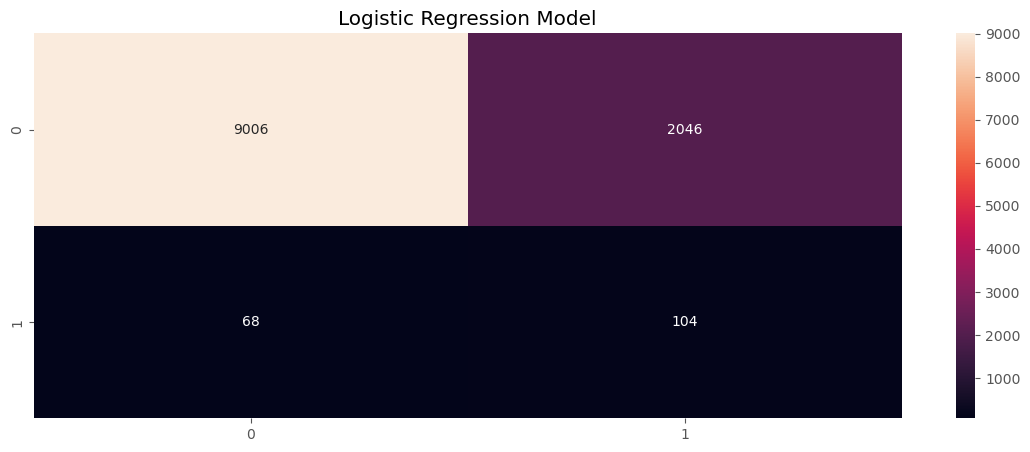

In [94]:
# Confusion matrix visualization of Logistic Regression

# Setting size
plt.figure(figsize=(14,5)) 

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_pred_test_tuned_logreg), annot=True, fmt='.0f')
plt.title('Logistic Regression Model')
plt.show()

In [95]:
# Function to create a metrics table for the classification report

def metrics_calculator(clf, X_test, y_test, model_name):
    
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

# Function of performance model: classification reports, confusion matrix and ROC curve.
def evaluation_visualization(clf, X_train, X_test, y_train, y_test, model_name):
    sns.set(font_scale=1.2)
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Define a colormap
    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')

    # Add the title for the entire figure
    fig.suptitle(model_name, fontsize=12, fontweight='bold')
    
    plt.tight_layout()  # Adjust layout to make room for the title
    plt.show()

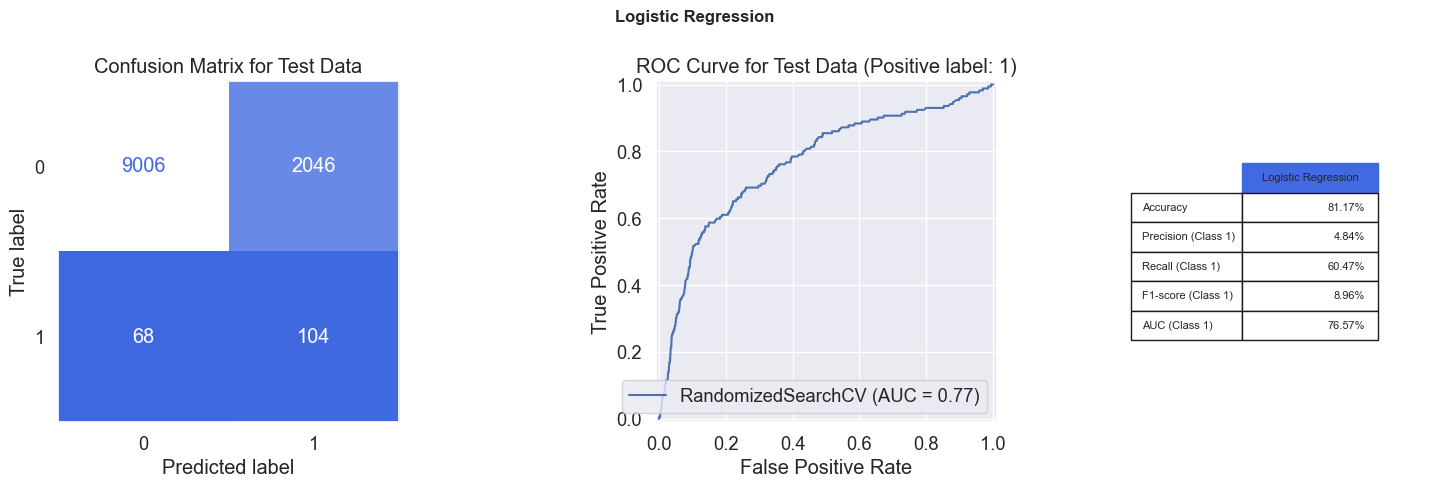

In [96]:
evaluation_visualization(random_search_logreg, X_train, X_test, y_train, y_test, 'Logistic Regression')

**Insights from the Logistic Regression Models**


**Insights from ROC AUC Score**
* Discrimination ability: Based on the previous calculation, We got ROC AUC score of 0.709 that indicates this model will correctly distinguish or discriminate between a randomly chosen positive instance (claim) and a randomly chosen negative instance (no claim). This score is above 0.5, which means the model performs better than random guessing. However, it is not close to 1, which would indicate perfect discrimination.
* Model performance: An AUC of 0.709 probably represents moderate performance. It indicates that the model has some ability to differentiate between claims and no claims but is not highly reliable. However, given the extreme imbalance (98.5% no claim, 1.5% claim), achieving an AUC of 0.709 is a positive sign. It shows that the model is capturing some of the signal from the minority class (claims).

**Insights from confusion matrix**

Confusion matrix breakdown:

* True Positives (TP): 106

The model correctly identifies 106 claim cases. This is crucial as these are the actual claims that need to be processed.

* False Positives (FP): 2006

The model wrongly predicts 2006 non-claim cases as claims. This high number of false positives indicates inefficiency, leading to unnecessary processing of non-claims, increased operational costs, and potential customer dissatisfaction.

* True Negatives (TN): 9006

The model correctly identifies 9006 non-claim cases. This shows the model is effective at recognizing cases where no claim is made, reducing unnecessary processing.

* False Negatives (FN): 68

The model misses 68 actual claims. False negatives are particularly problematic in insurance as these missed claims could lead to customer dissatisfaction and potential loss of trust in the insurance service.


**insights from classification report**
* Accuracy means the percentage of all predictions (both claims and no claims) that the model got right. This model can predict correclty with accuracy of 81.17% of the time.
* Precision tells us how many of the predicted claims were actually real claims. With a precision of 4.84%, out of all the times the model predicted "claim," only 4.84% were correct. As we expect our model to get relatively higher value of recall, low precision is the consequence.
* Recall for the claim class (class 1) shows how good the model is at finding actual claims from all the claims in the data. A recall of 60.47% means the model correctly identifies 60.47% of the real claims, which shows that the model can detect many claims but still misses some portion.
* F1 score is a combined measure of precision and recall. It balances the two metrics, indicating overall performance. We get an F1 score of 8.96% means that the model's performance in identifying claims is generally poor due to the very low precision, even though recall is moderate.

**Overall insights of the logistic regression model**

In overall, the model performs well in identifying non-claims (high TN) and has a moderate ability to catch actual claims (moderate TP and recall). However it has some weaknesses. The high number of false positives (FP) indicates inefficiencies and the low precision. The presence of false negatives (FN) is also concerning because missing actual claims is critical. One of some factors that inluence model is due to extreme imbalance, despite using SMOTE to generate synthetic samples of the minority class (claims), the extreme imbalance makes it hard for the model to correctly predict claims. The original imbalance is so high that even synthetic samples might not fully represent the complex patterns of claims.

**Gradient Booster Model Hyperparameter Tuning**

In [99]:
# Benchmark 2 gradboost 
# Max depth tree
max_depth = list(np.arange(1,10))

# learning rate
learning_rate = list(np.arange(0.01,1, 0.01))

# Number of tree
n_estimators = list(np.arange(50,500))

# Number of rows of train set from each tree (% of train set rows)
subsample = list(np.arange(0.2,1,0.1))

# Number of features for splitting (% from train set)
max_features = list(np.arange(1,10))

# Hyperparameter space Gradient Boosting
hyperparam_space_gradboost = {
    #'resampler':smote,
    'model__max_depth':max_depth , 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

# Benchmark model gb
grad = GradientBoostingClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_gradboost = Pipeline([
    ('outlier', handling_outliers()),
    ('transformer', transformer),
    ('scaler', scaler),
    ('resampler', rus), 
    ('model', grad)
    ])


# Hyperparameter tuning
random_search_gb = RandomizedSearchCV(
    estimator=estimator_gradboost, 
    param_distributions= hyperparam_space_gradboost, 
    cv = skf, 
    scoring = 'roc_auc', 
    n_jobs = -1, 
    verbose=1,
    n_iter=150
)

random_search_gb.fit(X_train, y_train)

print("Best Parameters:", random_search_gb.best_params_)
print("Best Score:", random_search_gb.best_score_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters: {'model__subsample': 0.2, 'model__n_estimators': 471, 'model__max_features': 6, 'model__max_depth': 1, 'model__learning_rate': 0.06999999999999999}
Best Score: 0.806315587273456


In [100]:
# Model after hyperparameter tuning
best_est_gb = random_search_gb.best_estimator_

# Fitting model
best_est_gb.fit(X_train, y_train)

# Predict to test set
y_pred_test_tuned_gb = best_est_gb.predict(X_test)
roc_auc_tuned_test_gb = roc_auc_score(y_test, y_pred_test_tuned_gb)


print("ROC AUC on Test Data using Best Params:", roc_auc_tuned_test_gb)

ROC AUC on Test Data using Best Params: 0.6912607630735045


In [101]:
print(classification_report(y_test, y_pred_test_tuned_gb))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86     11052
           1       0.04      0.63      0.07       172

    accuracy                           0.75     11224
   macro avg       0.52      0.69      0.46     11224
weighted avg       0.98      0.75      0.85     11224



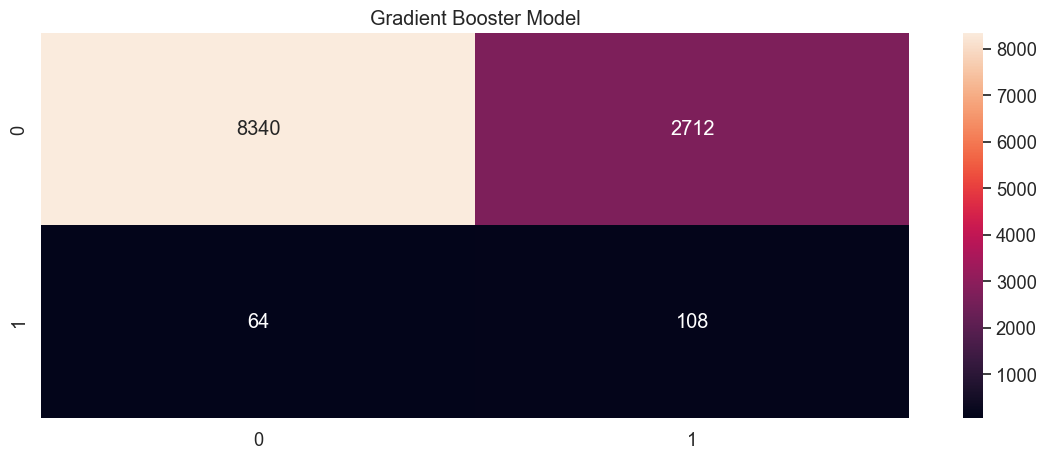

In [102]:
# Confusion matrix visualization of Xgboost

# Setting size
plt.figure(figsize=(14,5)) 

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_pred_test_tuned_gb), annot=True, fmt='.0f')
plt.title('Gradient Booster Model')
plt.show()

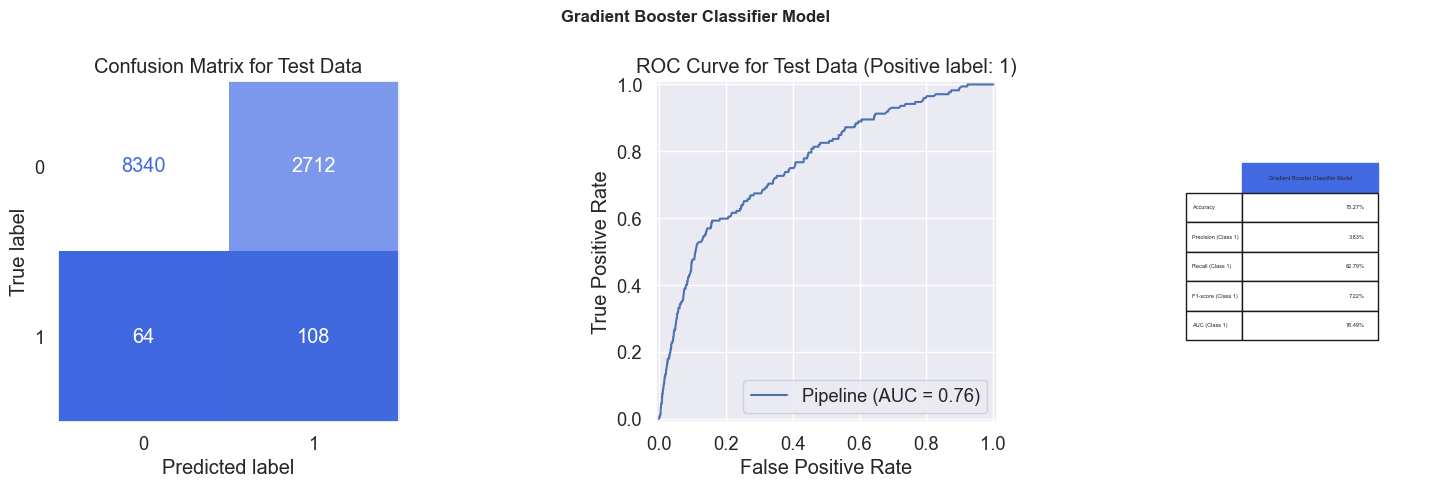

In [103]:
evaluation_visualization(best_est_gb, X_train, X_test, y_train, y_test, 'Gradient Booster Classifier Model')

**Insigths from the gradient booster model**

**Insights from ROC AUC Score**
* A ROC AUC score of 0.7067 suggests that the model has a good ability to distinguish between claims and non-claims. This score is less than the logistic regression, but still better than random guessing (which would have an AUC of 0.5). While the score shows the model is reasonably effective, the performance might still need enhancement, especially considering the imbalanced nature of the data.


**Insights from confusion matrix**

confusion matrix break down:

* True Negatives (TN) - 8340:

The model successfully identifies a large number of non-claims correctly. This contributes to operational efficiency by preventing unnecessary claim processing, thereby saving time and resources.

* True Positives (TP) - 108:

The model accurately predicts 108 actual claims. This is crucial for ensuring customer satisfaction and operational accuracy, as these claims will be handled appropriately.

* False Positives (FP) - 2712:

The model mistakenly classifies 2712 non-claims as claims. This high number of false positives suggests inefficiency, as these incorrect claims may require unnecessary investigation and resource allocation, potentially raising operational costs.

* False Negatives (FN) - 64:

The model misses 64 actual claims. These are important because they represent missed opportunities for accurate claims processing, which could lead to customer dissatisfaction and financial loss if these claims go unaddressed.


**Insights from classification report**
* Accuracy 75%, this means the model correctly classifies approximately 75% of the instances.
* A precision of 4% indicates that a small proportion of predicted claims are actual claims, highlighting a high number of false positives.
* A recall of 63% indicates that the model can identify 63% of actual claims. This gradient boost model has the highest recall in comparison to other models.
* The F1 score of 7.7% indicates that the model's performance in identifying claims is limited due to the low precision.


**Overall insights of the gradient boost model**

The model has a high number of true negatives, indicating good performance in identifying non-claims. This contributes to operational efficiency by reducing unnecessary claim processing. The number of false negatives, though relatively low, still represents missed claims which could lead to customer dissatisfaction. This model has the highest number of false positive in comparison to other models and make it less favourable as a higher false positive will increase the cost and operational time from assesing many false claims.

**AdaBoost Model Hyperparameter Tuning**

In [104]:
# Model benchmark ada

# Scaler, resampler, and base estimator
scaler = RobustScaler()
smote = SMOTE(random_state=0)
base_estimator = DecisionTreeClassifier()
ada = AdaBoostClassifier(estimator=base_estimator, random_state=0)

# Hyperparameter Ada Boost for RandomizedSearchCV
param_distributions_ada = {
    'model__n_estimators': [50, 70, 90, 120, 180, 200],
    'model__learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'model__estimator__max_depth': [1, 2, 3, 4, 5]  # Correct parameter key
}

# Pipeline for Ada
estimator_ada = Pipeline([
    ('outlier', handling_outliers()),  
    ('transformer', transformer),
    ('scaler', scaler),
    ('resampler', smote),
    ('model', ada)
])

# Placeholder for actual cross-validator
skf = StratifiedKFold(n_splits=5)

# Hyperparameter tuning with RandomizedSearchCV
random_search_ada = RandomizedSearchCV(
    estimator=estimator_ada, 
    param_distributions=param_distributions_ada,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='roc_auc', 
    n_jobs=-1, 
    cv=skf, 
    verbose=1,
    random_state=0  
)

random_search_ada.fit(X_train, y_train)

print("Best Parameters:", random_search_ada.best_params_)
print("Best Cross Validation Score:", random_search_ada.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'model__n_estimators': 180, 'model__learning_rate': 0.01, 'model__estimator__max_depth': 2}
Best Cross Validation Score: 0.806566094222642


In [105]:
# Model after hyperparameter tuning
best_est_ada = random_search_ada.best_estimator_

# Fitting model
best_est_ada.fit(X_train, y_train)

# Predict to test set
y_pred_test_tuned_ada = best_est_ada.predict(X_test)
roc_auc_tuned_test_ada= roc_auc_score(y_test, y_pred_test_tuned_ada)

print("ROC AUC on Test Data using Best Params:", roc_auc_tuned_test_ada)

ROC AUC on Test Data using Best Params: 0.715293033356059


In [106]:
print(classification_report(y_test, y_pred_test_tuned_ada))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     11052
           1       0.06      0.59      0.10       172

    accuracy                           0.84     11224
   macro avg       0.52      0.72      0.51     11224
weighted avg       0.98      0.84      0.90     11224



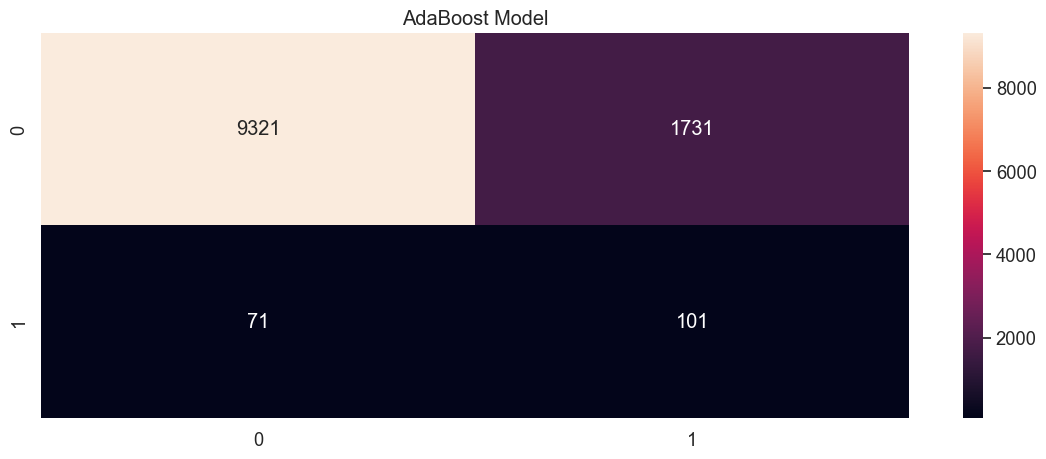

In [107]:
# Confusion matrix visualization of Xgboost

# Setting size
plt.figure(figsize=(14,5)) 

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_pred_test_tuned_ada), annot=True, fmt='.0f')
plt.title('AdaBoost Model')
plt.show()

In [108]:
# Function to create a metrics table for the classification report

def metrics_calculator(clf, X_test, y_test, model_name):
    
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

# Function of performance model: classification reports, confusion matrix and ROC curve.
def evaluation_visualization(clf, X_train, X_test, y_train, y_test, model_name):
    sns.set(font_scale=1.2)
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Define a colormap
    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')

    # Add the title for the entire figure
    fig.suptitle(model_name, fontsize=12, fontweight='bold')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
    plt.show()


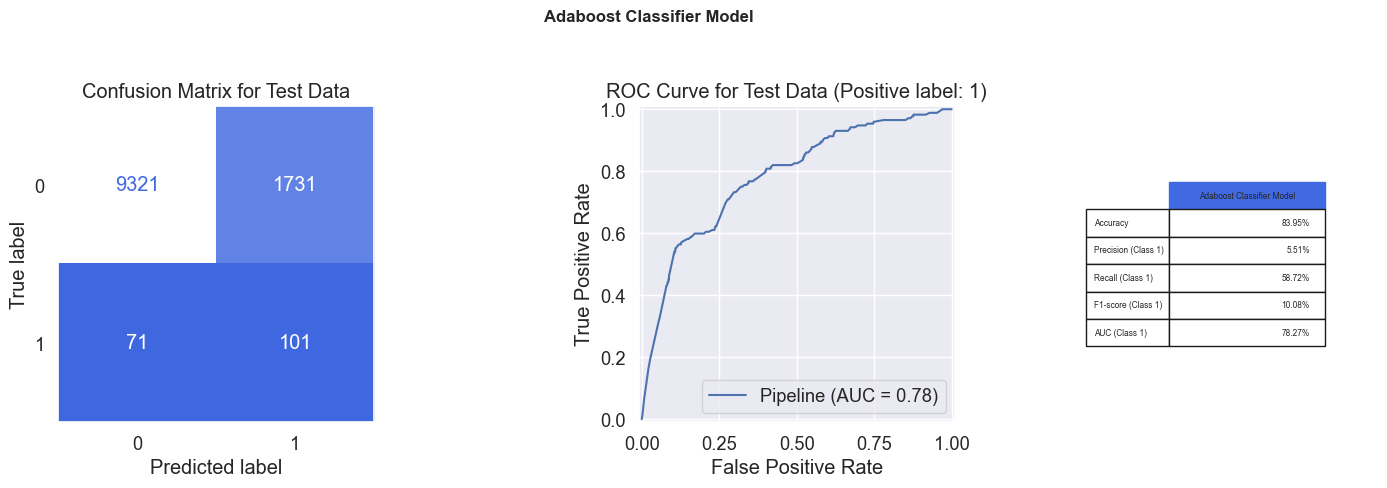

In [109]:
evaluation_visualization(best_est_ada, X_train, X_test, y_train, y_test, 'Adaboost Classifier Model')

**Insights from the AdaBoost model** 

**Insights from ROC AUC Score**
* Based on the ROC AUC score of 0.715 from Adaboost model, it means here is a 71.5% chance that the model will correctly distinguish between a randomly chosen positive instance (claim) and a randomly chosen negative instance (non-claim). The model can be used to identify potential claims with moderate confidence. While it's not perfect, it gives us a useful prediction tool to guide decisions or further investigations.

**Insights from confusion matrix**

Confusion matrix breakdown:

* True Positives (TP) - 101
The model correctly identifies 101 claims. This means that these actual claims will be processed, which is critical for customer satisfaction and operational accuracy. 

* False Positives (FP) - 1731
The model incorrectly predicts 1731 non-claims as claims. This high number indicates inefficiency, as these false claims may require unnecessary investigation. High false positives can lead to wasted resources and potentially increase operational costs.

* True Negatives (TN) - 9321
The model correctly identifies 9321 non-claims, preventing unnecessary claims processing. This high true negatives are beneficial for efficiency.

* False Negatives (FN) - 71
The model misses 71 actual claims. These are instances where a claim exists but the model fails to predict it.
Implication: False negatives are critical as they represent missed opportunities for accurate claims processing and can lead to customer dissatisfaction.

**Insight from classification repot**

* Accuracy (83.9%), The model correctly predicts 83.9% of the cases. This high accuracy reflects that the model performs well overall but doesn't necessarily mean it is effective at predicting the minority class (claims).

* Precision (5.51%), Only 5.51% of the instances that the model predicts as claims are actual claims. This low precision indicates a high number of false positives, meaning the model often incorrectly predicts claims.

* Recall (58.7%), the model correctly identifies 58.7% of the actual claims. This indicates a moderate ability to find real claims but shows the model misses a significant portion (41.3%) of actual claims.

* F1 Score (10.06%), The F1 score balances precision and recall. At 10.06%, this score is low, indicating that the model's overall performance in identifying claims is not strong, mainly due to the low precision.

**Overall Insights of the ada boost model**

The AdaBoost model has slightly improved precision and F1 score compared to the logistic regression model. This indicates a marginally better overall performance in handling the imbalanced dataset. Moreover, the AdaBoost model achieves higher accuracy and correctly identifies more non-claims, which reduces unnecessary processing. While the AdaBoost model reduces false positives, it slightly increases false negatives, meaning it misses more actual claims compared to the logistic regression and gradient boost models.

**Overal ROC AUC comparison**

| Model | Conditions | Train score  | Test score |
| --- | --- | --- | ---|
| Logistic Regression | Before Tuning |  0.812 | 0.711 |
| Logistic Regression |  After Tuning | 0.812 | 0.709 | 
| AdaBoost Classifier | Before Tuning |  0.786 | 0.707 |
| AdaBoost Classifier |  After Tuning | 0.807 | 0.715 | 
| GradBoost Classifier | Before Tuning |  0.780 | 0.705 |
| GradBoost Classifier |  After Tuning | 0.806 | 0.691 | 

### **Confusion Matrix, ROC Curves, and Classification Reports**

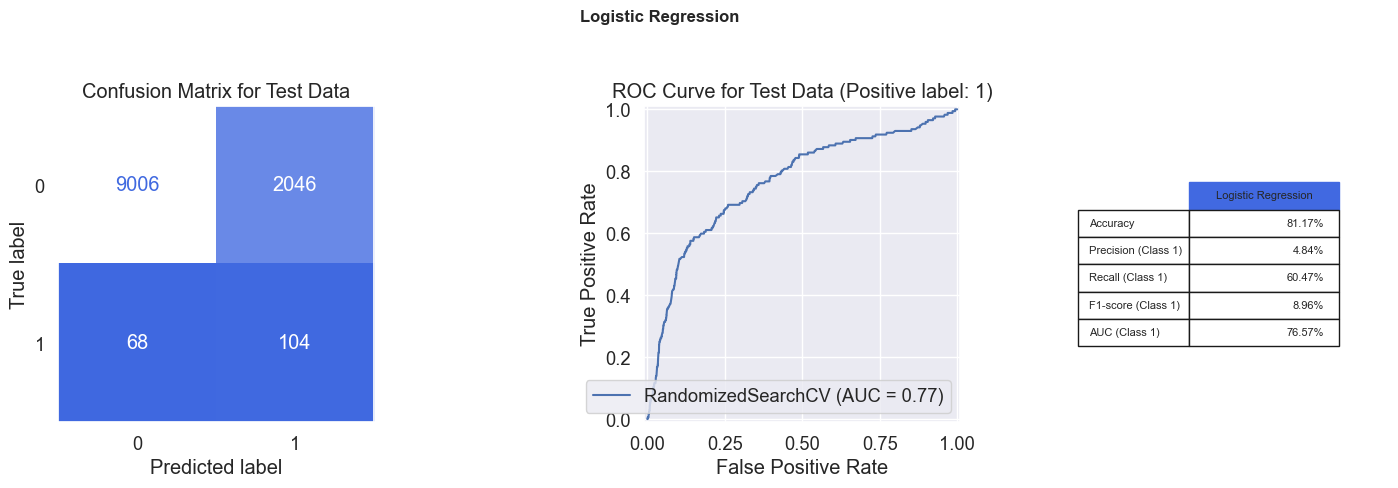

In [110]:
evaluation_visualization(random_search_logreg, X_train, X_test, y_train, y_test, 'Logistic Regression')

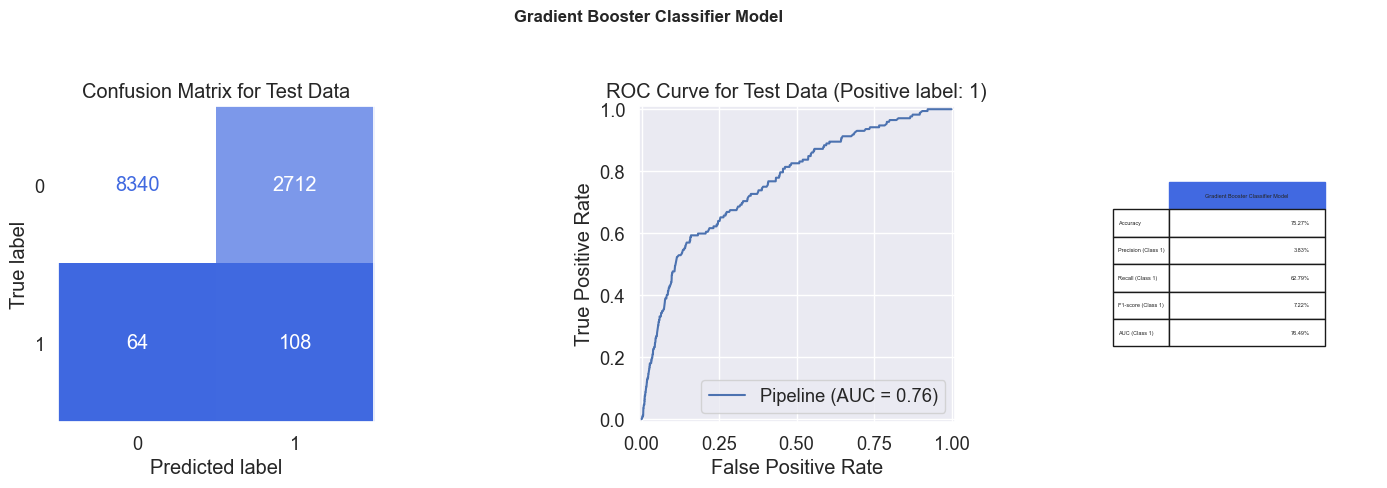

In [111]:
evaluation_visualization(best_est_gb, X_train, X_test, y_train, y_test, 'Gradient Booster Classifier Model')

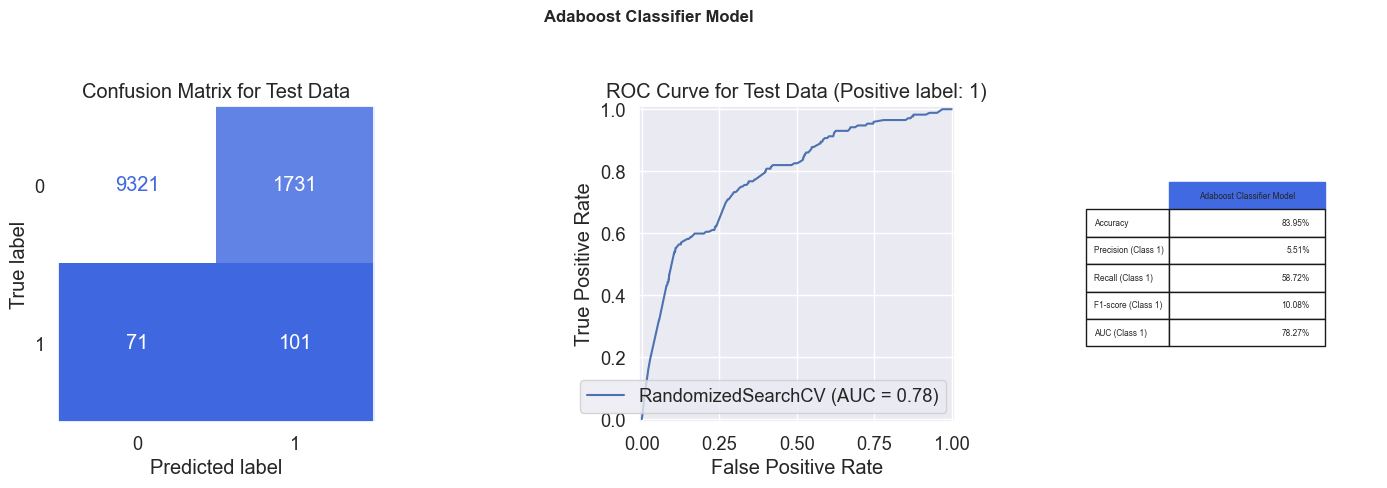

In [112]:
evaluation_visualization(random_search_ada, X_train, X_test, y_train, y_test, 'Adaboost Classifier Model')

### **Explanation about the best model**

**Logistic regression vs Gradient boost vs Ada boost**

Lets, compare these three models 

**Comparison between three models**

* Logistic Regression Model:

Strengths: Better at predicting non-claims (high TN), and has fewer false positives than Gradient Booster.

Weaknesses: Higher number of false negatives compared to Gradient Booster and AdaBoost, meaning it misses more actual claims. 

Insights: The logistic Regression provides a middle ground with decent recall and accuracy but suffers from low precision and F1 score.

* Gradient Booster Model:

Strengths: Best at identifying actual claims (highest TP) and has the lowest number of false negatives. Gradient Booster has the highest recall, meaning it is best at identifying actual claims in comparison to other models

Weaknesses: Highest number of false positives, indicating more non-claims are incorrectly predicted as claims.

Insights: The gradient booster excels in recall, making it the best at identifying actual claims, which is crucial if missing claims is particularly detrimental. However, it has the lowest precision and accuracy due to a high number of false positives.

* AdaBoost Model:

Strengths: Highest number of true negatives, indicating it is the best at identifying non-claims, and lowest number of false positives. 

Weaknesses: Slightly lower true positives and higher false negatives compared to Gradient Booster.

Insights: The ada boost shows the highest accuracy and F1 score, indicating it performs best overall considering both true positives and false positives. It also has the highest precision, meaning it has the least false positives. 


**Best Model**

AdaBoost seems to be the best model overall given its high accuracy, precision, F1 score, and ROC score in comparison to other models. Furthermore, given the extreme imbalance in our dataset, the AdaBoost model might offer the best trade-off by providing a good balance between precision (low false positives) and recall (acceptable true positives and false negatives). As we try to minimize false positive as much as possible (to minimize cost of claim inspection) and to hold small or reasonable amount of false negative, the AdaBoost model is the best choice as it has the lowest number of false positives and the highest number of true negatives.

**Explanation of Adaboost model**

Adaboost itself is ensemble learning method that combines the outputs of multiple weak learners to create a strong learner for classification tasks. The key idea behind AdaBoost is to focus on the training examples that are hardest to classify.

In general, there are 5 steps of How AdaBoost Works:
1. Initialization: Start with assigning equal weights to all training samples. These weights represent the importance of each sample during the training process.
2. Training Weak Learners: Here the weak classifier can be considered a model that performs slightly better than random guessing, a weak learner (typically a decision stump, which is a shallow decision tree). During each iteration, the algorithm trains the weak learner on given training data with the current sample weights. Then, calculate the error rate of this weak learner. The weak classifier aims to minimize the classification error, weighted by the sample weights
3. Adjusting Weights by increasing the weights of the misclassified samples so that the next weak learner focuses more on the hard-to-classify samples and decreasing the weights of the correctly classified samples.
4. Combining Weak Learners: The final model is a weighted sum of all the weak learners.
5. Finally, Steps 2–4 are repeated for the specified number of iterations (or until the stopping criterion is met), with the sample weights updated at each iteration. The final prediction is obtained by aggregating the predictions of all weak classifiers based on their weights. Stopping Criteria:The process continues for a predetermined number of iterations or until the error rate is minimized.

**Why AdaBoost Performs Well on our dataset**:

1. Good in handling imbalanced data

Although our travel insurance dataset is highly imbalanced (98.5% no claim and 1.5% claim), AdaBoost focuses on misclassified samples by increasing their weights. This means that it will pay more attention to the minority class (claims) as they are harder to classify correctly.
However, note that the inherent imbalance still poses challenges, and additional techniques like SMOTE (Synthetic Minority Over-sampling Technique) are used to further improve the model's performance.

2. Adaptability mechanism

AdaBoost adapts to the mistakes made by previous weak learners by focusing on difficult-to-classify instances, which helps in improving the overall model performance.
This adaptability is crucial for datasets with complex decision boundaries or minority classes that are often misclassified by simpler models.

3. Combining weak learners

By combining multiple weak learners, AdaBoost can create a strong predictive model that is better at capturing patterns and relationships in the data compared to a single model.
The final strong learner benefits from the collective knowledge of all the weak learners, leading to better generalization.

### **Learning Curve**

Learning curve is a graphical representation that shows how a models's performance changes overtime or with amount of training dataset. This technique is used to diagnose the behavior of machine learning algorithms and hor well a model is learning

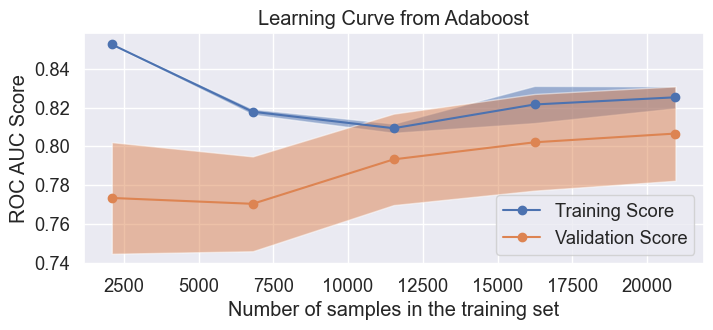

In [113]:
# Generate learning curve Adaboost
from sklearn.model_selection import LearningCurveDisplay

# Set figure size
fig, ax = plt.subplots(figsize=(8, 3))

# Set the required parameters
common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "scoring": 'roc_auc'
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(best_est_ada, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'])
ax.set_title(f'Learning Curve from Adaboost')
ax.set_ylabel('ROC AUC Score')

# Show the plot
plt.show()

**Insight from Adaboost learning curve**

At the beginning (training set of 2500), the difference of ROC score between training and validation line plot quite huge (large gap) that indicates overfitting. However after 20.000 of training, the learning process becomes more stable as the distance berween these two line graphs becomes shorter.

### **Feature Importance**

In [114]:
feature_importance = best_est_ada[-1].feature_importances_
feature_names = best_est_ada[1].get_feature_names_out()

In [115]:
df_coef = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

df_coef

feature  importance
9                      binary__Agency_3    0.495096
19                 remainder__Net Sales    0.171585
20      remainder__Commision (in value)    0.097460
13               binary__Product Name_3    0.068734
18                binary__Destination_3    0.039953
3     onehot__Duration Group_4-6 months    0.036500
5                    ordinal__Age Group    0.034956
14               binary__Product Name_4    0.030354
17                binary__Destination_2    0.021592
16                binary__Destination_1    0.003770
12               binary__Product Name_2    0.000000
15                binary__Destination_0    0.000000
0     onehot__Agency Type_Travel Agency    0.000000
11               binary__Product Name_1    0.000000
1   onehot__Distribution Channel_Online    0.000000
8                      binary__Agency_2    0.000000
7                      binary__Agency_1    0.000000
6                      binary__Agency_0    0.000000
4     onehot__Duration Group_7-9 months    0.000000
2   onehot__Duration Group_10-12 months    0.000000
10               binary__Product Name_0    0.000000

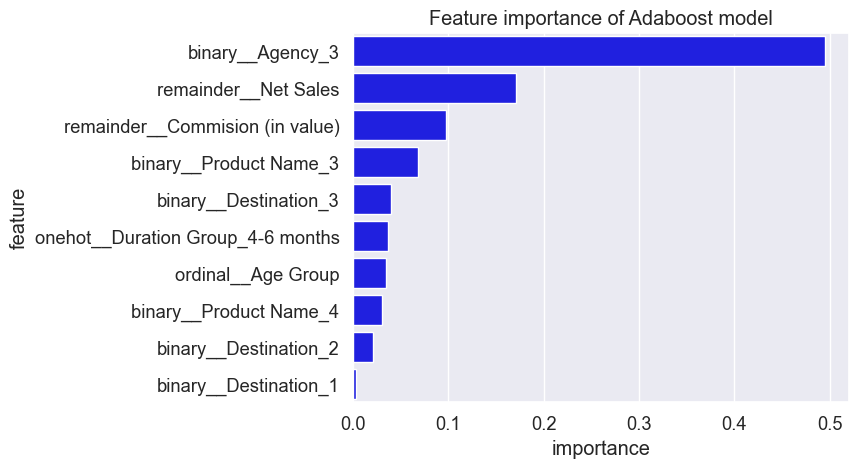

In [116]:
plt.title('Feature importance of Adaboost model')
sns.barplot(data=df_coef.head(10), x='importance', y='feature', color='blue')
plt.show()

**Insight from feature importance**



We use feature importance as it is crucial for in model interpretation and understanding. It refers to techniques that assign scores to input features based on how useful they are at predicting a target variable. Based on the feature importance graph above, there are some features that help our adaboost model in predicting that consist of: 

* 'Agency 3', the Adaboost model may see the agencies as one factors that most influence claim and not claim of customers. This probably related to the operation or service that specific agency have offered to the customers. 'Agency 3' has characteristics or polices that result in a higher or lower likelihood of claims. However, we are not sure about the direction of contribution of this feature, whether this feature will contribute to claim or not. This
* 'Net Sales', the sales of the insurance may not directly related to the customers, instead it more related to the travel insurance enterprise. However, the higher net sales usually related to the higher polices/premium that customer have to pay (we do not have represent the total premium in the dataset). As a travel insurance police usually 5-6% of total trip cost (source: [forbes]('https://www.forbes.com/advisor/travel-insurance/average-travel-insurance-cost/')), Higher net sales could indicate more expensive trips and higher price of police, which might be more likely to have claims.
* 'Commision (in value)', the commission value also associated with the sales transaction. Higher commissions might be related to more complex or higher-value sales, which could in turn be associated with a higher risk of claims.
* 'Product Name 3', the model may see the insurance product has influence on the prediction model, indicating that it might have features or coverage options that affect the likelihood of claims.
* 'Destination 3', the destination of the trip is also an important factor. Different destinations may have varying levels of risk associated with them, such as safety concerns, travel conditions, or the nature of travel activities undertaken at the destination.
* 'Duration Group 4-6 months', the duration of the trip is relevant to the model as well. Longer trips may increase the risk of incidents leading to claims, possibly due to extended exposure to risks or increased travel activities.
* 'Age Group', Different age groups might have varying risk profiles. For example, younger travelers might engage in more adventurous activities, while older travelers might have higher health-related claims.
* 'Product Name 4', similar to Product Name 3, this product might have unique features or cater to a specific demographic that influences claim likelihood.
* 'Destination 2', this destination might have certain characteristics that increase claim risks, such as local conditions or the type of travelers it attracts.
* 'Destination 1', this indicates that while this particular destination does have some impact, it is relatively minor compared to the other features.

Overall insights:

* Agency Type: The type of agency has a dominant influence on claim predictions, suggesting that understanding agency characteristics and practices could be critical for improving claim predictions.
* Financial Aspects: Features related to sales and commissions are also significant, indicating that the financial elements of the insurance policies (like their value and the commission structure) play a crucial role.
* Product and Destination Specifics: Certain insurance products and destinations are more likely to result in claims, which might be related to the coverage specifics and posses risks associated with the travel destinations.
* Demographics: Age groups also impact claim likelihood, reinforcing the importance of demographic.

### **LIME for feature explanation**

From the feature importance, we can get crucial information of which features that contributes to the prediction. However, we cannot get the direction of each feature contribution to the prediction, whether the feature is supporting claim or supporting not claim. That's why we are utilizing Local Interpretable Model-agnostic Explanations (LIME) technique for improving our machine learning explanation. The primary purpose of LIME is to interpret complex models by approximating them with simpler, interpretable models locally around the prediction of interest. For this step, we will use instances from customers in the dataset (claim and not claim) and explain which features and feature direction that contributes to the prediction of our machine learning model. 

**LIME preparation**

In [117]:
# Lime preparation

import lime
from lime import lime_tabular

# Define the column transformer
ordinal_mapping = [
    {'col': 'Age Group',
     'mapping': {
         'kids': 0,
         'teenagers': 1,
         'adults': 2,
         'pre-elderly': 3,
         'elderly': 4
     }}  # Example ordinal mapping
]

ct = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Agency Type', 'Distribution Channel', 'Duration Group']),
    ('ordinal', OrdinalEncoder(mapping=ordinal_mapping), ['Age Group']),
    ('binary', BinaryEncoder(), ['Agency', 'Product Name', 'Destination']),
], remainder='passthrough')

# Transform the training data
X_train_encoded = ct.fit_transform(X_train)
column_names = ct.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_encoded, columns=column_names)

# Initialize and fit the AdaBoost model
base_estimator = DecisionTreeClassifier(max_depth=2)  # Correctly set max_depth here
ada_lime = AdaBoostClassifier(estimator=base_estimator, n_estimators=180, learning_rate=0.01)
ada_lime.fit(X_train_df, y_train)

# Transform in Xtest
X_test_ct = ct.transform(X_test)
column_name = ct.get_feature_names_out()

X_test_df = pd.DataFrame(X_test_ct,columns=column_name)

In [118]:
def explainer_lime(index):
    explainer = lime_tabular.LimeTabularExplainer(
        training_data = X_train_df.to_numpy(),
        feature_names = X_train_df.columns.to_list(),
        class_names=['Not Claim','Claim'],
        mode = 'classification'
    )

    exp = explainer.explain_instance(
        X_test_df.iloc[index].values,
        ada_lime.predict_proba,
        num_features = 10
    )
    
    print(f"The prediction must predict this customers is: {('Claim' if y_test.iloc[index] == 1 else 'Not Claim')} from y_test")
    print(' ')
    
    exp.as_pyplot_figure()
    exp.show_in_notebook(show_table=True)

**LIME explanation for customer who has claimed his/her insurance**

Now, we will review a customer, from index of 71 or row 4282, who has claimed his/her insurance.

In [119]:
X_test.iloc[[71]]

Agency Agency Type Distribution Channel      Product Name Destination  \
4282    C2B    Airlines               Online  Annual Gold Plan   SINGAPORE   

      Net Sales  Commision (in value) Age Group Duration Group  
4282      333.0                 83.25    adults   10-12 months

In [120]:
y_test.iloc[[71]]

4282    1
Name: Claim, dtype: int32

The prediction must predict this customers is: Claim from y_test
 


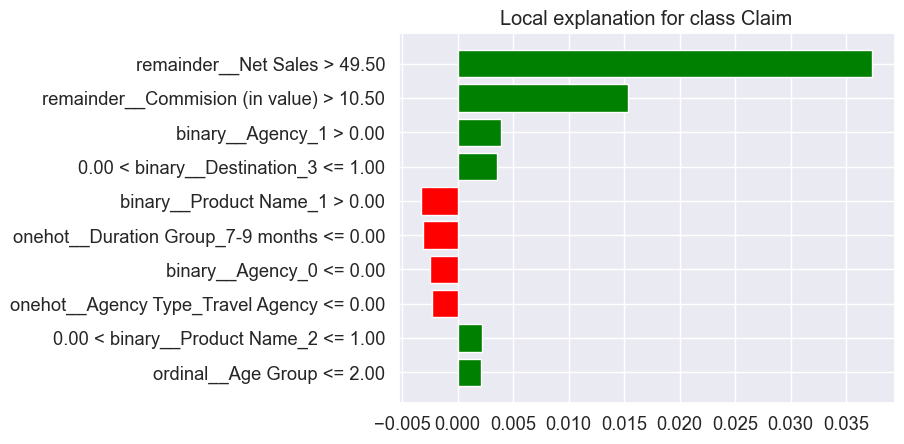

In [121]:
explainer_lime(71)

The graph above describes which features that predicted customer as claim and not claim. Here, the LIME explainer has given us insights into why a particular prediction was made for a customer in the travel insurance dataset. We use two graphs from LIME for the purpose of complementing explanation, In the first graph from above, the orange color indicates features that locally contributes to claim, while the blue color indicate features that locally contributes to not claim. While in the second graph, the green color indicates features that locally contributes to claim, while the red color indicate features that locally contributes to not claim.

Feature explanation for the specific instance (customer in rows of 4282, customer who claimed his/her insurance)
* Net Sales (333): This feature has the highest contribution to the model’s prediction (with 0.035 contribution). Higher net sales are likely to influence the probability of a customer making a claim, suggesting that customers who purchase higher-value policies might be more prone to filing claims. Based on LIME explanation, the net sales from this particular customer (USD 333) which is higher than (USD 49.50) has contribute to probabilty for claiming.

* Commision (in value) (83.25): The commission value (with 0.014 contribution) also plays crucial role. Higher commission amounts may be associated with higher premiums or more comprehensive coverage, which could be related with a higher likelihood of claims. Based on the graph above, the commision of (USD 83.25) which is higher than (USD 10.5), is the factor that drive customer to claim his/her travel insurance. 

* Duration Group_10-12 months: This indicates that the duration of the insurance coverage (10-12 months) is a factor in the prediction. Longer coverage durations might increase the likelihood of claims due to the extended period of risk exposure. 

* Product: In contrast to net sales and comission (in value), this feature of 'Product name' or insurance product is the factor that likely causing the customers to not claim his/her insurance.

* Destination: The destination being classified as ‘3’ which is Singapore also an important factor. This could imply that certain destinations have higher risk profiles or are more likely to see claims, possibly due to travel patterns or inherent risks at these destinations.

Overall insights:

For this particular example, net sales, commission, duration of coverage, and destination are the key drivers of the claim prediction, reflecting the financial aspects of the policy and risks or pattern that associated with the travel destination and duration.


**LIME explanation for customer who has not claimed his/her insurance**

Now, we will review a customer, from index of 0 or row 570, who has not claimed his/her insurance.

In [122]:
X_test.iloc[[0]]

Agency    Agency Type Distribution Channel       Product Name Destination  \
570    EPX  Travel Agency               Online  Cancellation Plan   SINGAPORE   

     Net Sales  Commision (in value) Age Group Duration Group  
570       10.0                   0.0    adults     1-3 months

In [123]:
y_test.iloc[[0]]

570    0
Name: Claim, dtype: int32

The prediction must predict this customers is: Not Claim from y_test
 


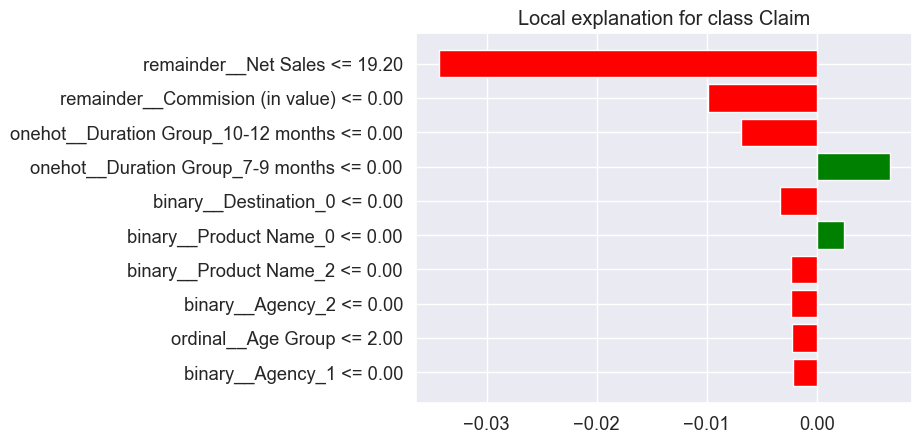

In [124]:
explainer_lime(0)

For this specific instance (Customer in row of 570), LIME explains why the model predicted that the customer will not claim their insurance. 

Below are the insights derived from the feature contributions provided by LIME:

* Net Sales (10): A negative contribution (-0.04) indicates that the net sales of USD 10 from this customer (which is less than USD 19.20 as boundary/threshold according to LIME) reduce the likelihood of the customer filing a claim. A low net sales value of 10.00 might indicate less financial activity associated with this policy. This could imply that customers who are included in this range (that produce net sales for the insurance for less than USD 19.20) are less likely to claim, possibly due to better financial stability or other factors.

* Commision (in value): A negative contribution (about -0.01) and commission of USD 0 suggests that there might not have been any transactions that warranted a commission. This lack of commission might correlate with fewer interactions with the insurance policy, hence a lower likelihood of a claim.

* Duration Group_10-12 months, Destination_3, Duration Group_4-6 months: These feature do not have negative contribution, however their number are small to contribute to claim. The destination of '3', Singapore, might be similar pattern, like the previous instance (customer row 4282), one of factor that contribute to claim.

* Agency type: The customer used a travel agency. Travel agencies might be associated with fewer claims, possibly due to better travel planning and fewer issues, leading to a lower probability of filing a claim.

* Destination_0, Agency_1, and Product_name_2: The customer’s destination is not in category 0, not in agency 1, not in insurance product name 2, so these feature does not affect the prediction.

Overall insights:

The most notable features influencing the prediction that this customer will not claim their insurance are Net Sales and Commision (in value). These features might suggest that minimal financial activity and interaction with the policy, leading to a lower likelihood of a claim.

### **Cost Benefit Analysis**

Now we will try to simulate cost benefit analysis of business model with and without machine learning by using confusion matrix of tuned Adaboost.

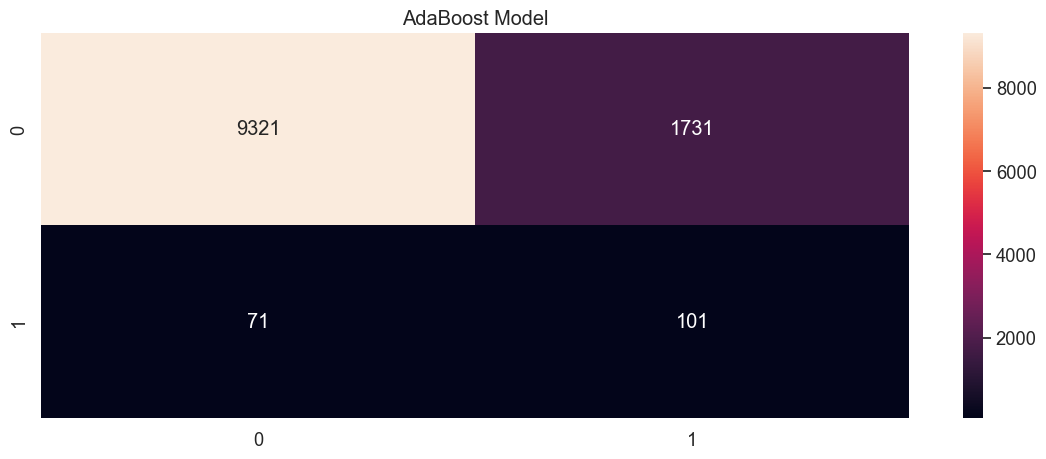

In [125]:
# Confusion matrix visualization of Ada Boost model

# Setting size
plt.figure(figsize=(14,5)) 

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_pred_test_tuned_ada), annot=True, fmt='.0f')
plt.title('AdaBoost Model')
plt.show()

**Cost and Benefit Analysis**

Before doing simulation, lets make assumption based on our dataset distribution and given data from the previous source we have mentioned in business understanding chapter.

**Assumptions and given data:**
* Policy Price Range: USD 154 to USD 437, with an average of USD 228.
* Average Claim Cost: USD 1241.
* Claims Processing Cost: USD 200 per claim (claim inspection: document processing cost, investigation cost, document verification cost, and workers)
* Total Policies = 𝑇𝑃 + 𝑇𝑁 + 𝐹𝑃 + 𝐹𝑁 = 101 + 9321 + 1731 + 71 = 11224
* Expected Claims Without Machine Learning:
    * Based on the given imbalance ratio of our datase, only 1.5% of these policies are expected to be actual claims.
    * Expected Claims = Total Policies × 0.015 = 11224×0.015 = 168.36 ≈ 168 (actual claims)

Now, lets, simulate the business model

**Without Machine Learning:**
1. Total Policies: 11224.
2. Expected Claims (1.5% of total policies): 11224 x 0.015 = 168.36 ≈ 168 (actual claims).
3. Costs:
    * Processing Cost for All Claims (no differentiation): 11224 x USD 200 = USD 2,244,800.
    * Actual Claims Cost: 168 x USD 1241 = USD 208,488.
    * Total Cost Without ML: USD 2,244,800 + USD 208,488 = USD 2,453,288.

**With Machine Learning (Using AdaBoost):**
1. Total Policies: 11224.
2. Costs:
    * Processing claim costs:
        * Correctly identified claims (TP + FN): (101 + 71) x USD 200 = USD 34,400.
        * Incorrectly identified non-claims (FP): 1731 x USD 200 = USD 346,200.
    * Claim Payout Costs:
        * True Positives: 101 x USD 1241 = USD 125,341.
        * False Negatives: 71 x USD 1241 = USD 88,111.
    * Total Cost With ML:
        * Processing Cost: USD 34,400 + USD 346,200 = USD 380,600.
        * Claim Cost: USD 125,341 + USD 88,111 = USD 213,452.
        * Total Cost: USD 380,600 + USD 213,452 = USD 594,052.

**Cost Savings Calculation:**
1. Total Cost Without ML: USD 2,453,288.
2. Total Cost With ML: USD 594,052.
3. Savings: USD 2,453,288 - USD 594,052 = USD 1,859,236.

**Insights**

Using the AdaBoost machine learning model for predicting travel insurance claims results in high cost savings and benefits:
* Total Savings: USD 1,859,236. 
* Primary Savings: Derived from reducing the number of false positives and false negatives, which lowers both processing and claim payout costs.
* Potential additional income from investment: As the travel insurance enterprise also generating profit from some portion of collected premium by investing it in the stock with medium risks, we can expect additional return of 7% (per year) from some portion of the total saving.

**Additional insights of using machine learning**
* Effective Claim Management: Machine learning helps in accurately identifying potential claims automatically, making efficient in decision making process for insurance claim thus optimizing resources and reducing unnecessary processing. Without machine learning, the process of evaluating and approving claims can be slow and labor-intensive, leading to delays and increased operational costs.
* Reducing manual process and higher error rates: Manual processes are prone to human error, resulting in incorrect claim approvals or rejections. This can lead to customer dissatisfaction and potential legal disputes.
* Reduce operational costs: More resources are required for manual claim processing, including staff time and administrative overheads. This can drastically increase operational costs.

### **Model Limitation**

We have to be mindful to not conduct interpretation outside interval of the independent variable. This model can be used within range feature of our features:
* 'Net Sales' from USD 0 to USD 682.
* 'Commision (in value)' from USD 0 to 262.76.
* 'Duration' or  'Duration Group' from 1 to 12 months.
* 'Age' or 'Age Group' from 0 to 75 years old.
* 'Distribution Channel' consists of Online and offline.
* 'Product Name' consist of 26 products that have been previously stated in the beginning
* 'Destination' consist of 138 countries destination that have been previously stated in the beginning

Outside of these ranges, the model will likely not valid.



## **7. Conclusion and recommendation**

### **Conclusion**

* We are using ROC AUC score as this matrix can be used as good indicator for discriminating between claim and non-claim 
* Our best model based on the result of ROC AUC score, classification report, and confusion matrix is the tuned AdaBoost model that demonstrate high reduction in both false positives and false negatives compared to logistic regression and gradient boosting model. This model has ROC AUC score of 0.715 that indicate 71.5% in distinguishing claim and non claim. while this is not perfect, it provides a reasonable level of discrimination ability, particularly in the context of a highly imbalanced dataset.
* The best parameter of of the tuned AdaBoost model consist of: 
    * n_estimators : 180 
    * learning_rate : 0.01 
    * max_depth: 2
* Based on feature importance, features that crucial for claim the AdaBoost model  consist of 'Agency_3', 'Net Sales', 'Commission (in value)', 'Product Name_3', and 'Destination_3'. This suggests that specific agencies, financial metrics, insurance product types, play an important role in claim predictions.
* Based on local interpretation using LIME (Local Interpretable Model-agnostic Explanations) for the AdaBoost model,
    * 'Net Sales' & 'Commision in (Value)': Higher value of these features contributes positively to the likelihood of a claim.
    * 'Duration' or 'Duration Group': Longer coverage durations might increase the likelihood of claims due to the extended period of risk exposure.
    * 'Destination': The specific destination like 'Singapore' is associated with more claim.
* According to the cost benefit analyis, by implementing the AdaBoost model, the travel insurance company can drastically cut down on operational costs, leading to more efficient and cost-effective claim management. Based our financial calculation it has potential saving of USD 1,859,236 from 11,224 policies.
* This models only valid within ranges of features in model limitations.

### **Recommendation**

**Recommendations for the machine learning model**
* Further investigate and engineer features that might improve model performance and lower overfitting.
* Perform a more thorough hyperparameter tuning using techniques such as Grid Search to fine-tune the model parameters and achieve better performance.
* Adding feature such as a policy price that potentially improve model and can be explained better.
* Beyond SMOTE, explore other resampling techniques such as ADASYN or SMOTE-ENN to handle the extreme class imbalance more effectively.
* Implement cost-sensitive algorithms that assign different penalties to misclassification errors of the minority class (claims) and the majority class (non-claims).
* Trying to explore other machine learning metrics as standard to find ways for improving precision and further reducing False Positive and True Negative.
* It will be better to keep researching and applying other algorithms, while also trying to tune up and applying other resampling techniques, to this dataset in order to keep improving the performance 

**Recommendations for the business**
* Use the predictions from the machine learning model to automate the initial screening of claims, reducing manual workload and speeding up the claims handling process.
* Based on model predictions, adjust policy terms and conditions to better manage risk. For instance, offer different premiums or coverage limits based on the predicted likelihood of claims.
* Establishing additional rules or limitations to the policy: 
    * e.g., limiting destination of travel, excluding the insurance coverage to the region with conflict such as Israel, Palestine, Afghanistan, etc.  
    * e.g, Establishing term to exclude people with previous or serious medical condition for better managing risks.  
* Establising higher premium to customers who have high risk profiles or customers that are likely to claim.
* Attracting more customers by providing discount to customers with low risk profile or customers that are not likely to claim.
* Focus on quantity: attracting as much as possible customers, even when they are more likely to result in smaller financial gain (low net sales), as these customers more likely not to claim in comparison to customers with high policy value.
* Further investigate the agency services or terms that improving the probability for customers to claim.


### **Saving final model**

In [126]:
# Saving Model

import pickle

# Fitting model to all data
best_est_ada.fit(X, y)

# Save Model
pickle.dump(best_est_ada, open('adaboost_for_claim.sav', 'wb'))